In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
train_df = pd.read_csv("train_data.csv", sep=",", na_values=[" ","?","#"])
test_df = pd.read_csv("test_data.csv", sep=",", na_values=[" ","?","#"])
discount_df = pd.read_csv("discount_features.csv", sep=",", na_values=[" ","?","#"]
                                ,parse_dates=['date'])
foot_fall_df = pd.read_csv("foot_fall.csv", sep=",", na_values=[" ","?","#"])

In [3]:
print(train_df.shape)
print(test_df.shape)
print(discount_df.shape)
print(foot_fall_df.shape)

(22624345, 6)
(773535, 6)
(17277949, 4)
(10, 1268)


In [4]:
train_df.head()

year  month  day  city  medicine  sales
0  2015      1    2     1         1   24.0
1  2015      1    2     1         2  144.0
2  2015      1    2     1         3   84.0
3  2015      1    2     1         4   24.0
4  2015      1    2     1         5    8.0

In [5]:
train_df.tail()

year  month  day  city  medicine  sales
22624340  2018      6   30    10      3056    8.0
22624341  2018      6   30    10      3163   16.0
22624342  2018      6   30    10      3164    8.0
22624343  2018      6   30    10      3157    4.0
22624344  2018      6   30    10      3165   56.0

## Observations

The train data is dated from 2nd january 2015 to 30th June 2018

In [6]:
train_df.describe() 

year         month           day          city      medicine  \
count  2.262434e+07  2.262434e+07  2.262434e+07  2.262434e+07  2.262434e+07   
mean   2.016510e+03  6.220520e+00  1.572557e+01  5.488639e+00  1.169635e+03   
std    1.023379e+00  3.449989e+00  8.789664e+00  2.849396e+00  8.016848e+02   
min    2.015000e+03  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.016000e+03  3.000000e+00  8.000000e+00  3.000000e+00  5.110000e+02   
50%    2.017000e+03  6.000000e+00  1.600000e+01  5.000000e+00  1.034000e+03   
75%    2.017000e+03  9.000000e+00  2.300000e+01  8.000000e+00  1.718000e+03   
max    2.018000e+03  1.200000e+01  3.100000e+01  1.000000e+01  3.389000e+03   

              sales  
count  2.262434e+07  
mean   5.166032e+01  
std    1.100297e+02  
min   -9.948000e+03  
25%    1.200000e+01  
50%    2.800000e+01  
75%    5.600000e+01  
max    8.299200e+04

In [7]:
len(train_df[train_df["sales"]<0]) 

1672

## Observation

1672 rows have negative sales

In [8]:
test_df.head()

id  year  month  day  city  medicine
0   1  2018      7    1     1      1292
1   2  2018      7    1     1         1
2   3  2018      7    1     1         2
3   4  2018      7    1     1         3
4   5  2018      7    1     1         4

In [9]:
test_df.tail()

id  year  month  day  city  medicine
773530  773531  2018      7   31    10      3163
773531  773532  2018      7   31    10      3164
773532  773533  2018      7   31    10      3157
773533  773534  2018      7   31    10      3165
773534  773535  2018      7   31    10      3057

## Observations

The test data ranges from 1st July 2018 to 31st July 2018

In [10]:
discount_df.head()

date  city  medicine  discounted
0 2016-04-01     1         1           0
1 2016-04-01     1         2           0
2 2016-04-01     1         3           0
3 2016-04-01     1         4           0
4 2016-04-01     1         5           0

In [11]:
discount_df.tail()

date  city  medicine  discounted
17277944 2018-07-31    10      3163           0
17277945 2018-07-31    10      3164           0
17277946 2018-07-31    10      3157           0
17277947 2018-07-31    10      3165           0
17277948 2018-07-31    10      3057           0

## Observation

We have discount data from 1 April 2016 to 31 July 2018

In [12]:
foot_fall_df.head(10)

city  2015-01-02  2015-01-03  2015-01-04  2015-01-05  2015-01-06  \
0  Ahmedabad      9384.0      6808.0      8064.0     10248.0     11180.0   
1  Bangalore     16644.0     14640.0     15660.0     19056.0     19740.0   
2    Chennai     19544.0     13752.0     13736.0     19740.0     21604.0   
3      Delhi     16832.0     13256.0     14520.0     17324.0     17672.0   
4  Hyderabad     13588.0     11548.0     11600.0     16336.0     18364.0   
5     Jaipur     13000.0     11616.0     11848.0     12240.0     10992.0   
6    Kolkata     13948.0     12104.0     12752.0     14492.0     14360.0   
7    Lucknow     12308.0      9228.0     10792.0     13836.0     13188.0   
8     Mumbai     19284.0     14472.0     16676.0     19684.0     19700.0   
9      Other      8572.0      7180.0      6716.0      8616.0      9252.0   

   2015-01-07  2015-01-08  2015-01-09  2015-01-10  ...  2018-06-21  \
0      6876.0      6436.0      7104.0      5924.0  ...      9624.0   
1     14280.0     12740.0     13480.0     11928.0  ...     12412.0   
2     12820.0     12244.0     11956.0     10508.0  ...     10420.0   
3     13356.0     12408.0     13072.0     10788.0  ...     12308.0   
4     10788.0      9280.0      9264.0      8848.0  ...      8832.0   
5     11072.0     10556.0     11208.0     10180.0  ...      9676.0   
6     11984.0     11304.0     11728.0     10596.0  ...     11700.0   
7      9484.0      9004.0      8912.0      8208.0  ...      8588.0   
8     15484.0     14372.0     16024.0     13292.0  ...     14068.0   
9      6852.0      6220.0      6808.0      5688.0  ...      6512.0   

   2018-06-22  2018-06-23  2018-06-24  2018-06-25  2018-06-26  2018-06-27  \
0     10476.0      9584.0     11940.0     13040.0     12144.0     10164.0   
1     13392.0     11948.0     13860.0     16384.0     16192.0     12388.0   
2     11044.0     10320.0     11988.0     15248.0     15188.0     10596.0   
3     11772.0     11492.0     13284.0     16224.0     15688.0     11728.0   
4      8756.0      8528.0      9464.0     13356.0     14384.0      8900.0   
5     10496.0      9556.0     10500.0     11292.0     10544.0      9632.0   
6     11884.0     10488.0     12116.0     13696.0     13348.0     11576.0   
7      7640.0      7812.0      8676.0     11640.0     10536.0      8136.0   
8     15404.0     14088.0     16368.0     18800.0     18640.0     14772.0   
9      6716.0      6164.0      6980.0      8056.0      8480.0      6480.0   

   2018-06-28  2018-06-29  2018-06-30  
0      9784.0     10472.0     10040.0  
1     12124.0     13412.0     12172.0  
2      9716.0     10776.0     10336.0  
3     11164.0     12272.0     11692.0  
4      7792.0      8420.0      9240.0  
5      9656.0     10316.0      9652.0  
6     10752.0     11896.0     10528.0  
7      7644.0      7860.0      7880.0  
8     14208.0     16044.0     14628.0  
9      6004.0      7144.0      6040.0  

[10 rows x 1268 columns]

In [13]:
train_df["sales"].abs().min()

0.016

## Observation

In [14]:
## Checking for NA values

In [15]:
train_df.isna().sum()

year        0
month       0
day         0
city        0
medicine    0
sales       0
dtype: int64

In [16]:
test_df.isna().sum()

id          0
year        0
month       0
day         0
city        0
medicine    0
dtype: int64

In [17]:
foot_fall_df.isna().sum()

city          0
2015-01-02    0
2015-01-03    0
2015-01-04    0
2015-01-05    0
             ..
2018-06-26    0
2018-06-27    0
2018-06-28    0
2018-06-29    0
2018-06-30    0
Length: 1268, dtype: int64

In [18]:
discount_df.isna().sum()

date          0
city          0
medicine      0
discounted    0
dtype: int64

## Observations

Initially there are no na values in the data

In [19]:
discount_df.dtypes

date          datetime64[ns]
city                   int64
medicine               int64
discounted             int64
dtype: object

In [20]:
## Creating Copies of the datasets
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()
discount_df_copy = discount_df.copy()
foot_fall_df_copy = foot_fall_df.copy()

In [21]:
## dismantling the date column in discount_features_copy into year, month and day
discount_df_copy.dtypes

date          datetime64[ns]
city                   int64
medicine               int64
discounted             int64
dtype: object

In [22]:
discount_df_copy['year'] = discount_df_copy['date'].dt.year
discount_df_copy['month'] = discount_df_copy['date'].dt.month
discount_df_copy['day'] = discount_df_copy['date'].dt.day

In [23]:
discount_df_copy.head()

date  city  medicine  discounted  year  month  day
0 2016-04-01     1         1           0  2016      4    1
1 2016-04-01     1         2           0  2016      4    1
2 2016-04-01     1         3           0  2016      4    1
3 2016-04-01     1         4           0  2016      4    1
4 2016-04-01     1         5           0  2016      4    1

In [24]:
train_df_discounted_with_date = pd.merge(train_df_copy, discount_df_copy
                            ,how="inner", on=["year","month","day","city","medicine"])
train_df_discounted_with_date.head()

year  month  day  city  medicine  sales       date  discounted
0  2016      4    1     1         1   12.0 2016-04-01           0
1  2016      4    1     1         2   52.0 2016-04-01           0
2  2016      4    1     1         3  112.0 2016-04-01           0
3  2016      4    1     1         4   28.0 2016-04-01           0
4  2016      4    1     1         5   12.0 2016-04-01           0

In [25]:
## Dropping the date column in discount_features_copy
discount_df_copy.drop("date", axis = 1, inplace=True)

In [26]:
discount_df_copy.head() 

city  medicine  discounted  year  month  day
0     1         1           0  2016      4    1
1     1         2           0  2016      4    1
2     1         3           0  2016      4    1
3     1         4           0  2016      4    1
4     1         5           0  2016      4    1

In [27]:
## Merging the train_data_copy and the discounted_data_copy for adding discount feature
train_df_discounted = pd.merge(train_df_copy, discount_df_copy
                            ,how="left", on=["year","month","day","city","medicine"])

In [28]:
print(train_df_copy.shape)
print(train_df_discounted.shape)

(22624345, 6)
(22669553, 7)


In [29]:
##train_discounted.drop_duplicates(inplace=True)

In [30]:
print(train_df_copy.shape)
print(train_df_discounted.shape)

(22624345, 6)
(22669553, 7)


In [31]:
train_df_discounted.head()

year  month  day  city  medicine  sales  discounted
0  2015      1    2     1         1   24.0         NaN
1  2015      1    2     1         2  144.0         NaN
2  2015      1    2     1         3   84.0         NaN
3  2015      1    2     1         4   24.0         NaN
4  2015      1    2     1         5    8.0         NaN

In [32]:
train_df_discounted.tail()

year  month  day  city  medicine  sales  discounted
22669548  2018      6   30    10      3056    8.0         1.0
22669549  2018      6   30    10      3163   16.0         0.0
22669550  2018      6   30    10      3164    8.0         0.0
22669551  2018      6   30    10      3157    4.0         0.0
22669552  2018      6   30    10      3165   56.0         0.0

In [33]:
train_df_discounted.isna().sum()

year                0
month               0
day                 0
city                0
medicine            0
sales               0
discounted    6119931
dtype: int64

In [34]:
train_df_discounted.fillna(0,inplace=True)

In [35]:
train_df_discounted.head()

year  month  day  city  medicine  sales  discounted
0  2015      1    2     1         1   24.0         0.0
1  2015      1    2     1         2  144.0         0.0
2  2015      1    2     1         3   84.0         0.0
3  2015      1    2     1         4   24.0         0.0
4  2015      1    2     1         5    8.0         0.0

In [36]:
## Dropping id column from the test_data_copy()
test_df_copy.drop("id", axis=1, inplace=True)

In [37]:
test_df_copy.head()

year  month  day  city  medicine
0  2018      7    1     1      1292
1  2018      7    1     1         1
2  2018      7    1     1         2
3  2018      7    1     1         3
4  2018      7    1     1         4

In [38]:
## Merging and test and discounted
test_df_discounted = pd.merge(test_df_copy, discount_df_copy, how="inner"
                           ,on=["year","month","day","city","medicine"])

In [39]:
test_df_discounted.head() 

year  month  day  city  medicine  discounted
0  2018      7    1     1      1292           0
1  2018      7    1     1         1           0
2  2018      7    1     1         2           1
3  2018      7    1     1         3           0
4  2018      7    1     1         4           0

In [40]:
print(test_df_copy.shape)
print(test_df_discounted.shape)

(773535, 5)
(773535, 6)


In [41]:
print(train_df_discounted.medicine.nunique())
print(test_df_discounted.medicine.nunique())

3389
3289


In [42]:
train_neg_df_discounted = train_df_discounted[train_df_discounted["sales"]<0]
train_neg_df_discounted.shape

(1672, 7)

In [43]:
train_neg_df_discounted.head()

year  month  day  city  medicine  sales  discounted
17792  2015      1    3     6       117 -32.32         0.0
73647  2015      1    8     4        50  -8.00         0.0
83397  2015      1    9     2       785  -4.00         0.0
85164  2015      1    9     4       232  -8.00         0.0
86418  2015      1    9     5       253 -40.00         0.0

In [44]:
train_neg_df_discounted.isna().sum()

year          0
month         0
day           0
city          0
medicine      0
sales         0
discounted    0
dtype: int64

In [45]:
train_neg_df_discounted.medicine.nunique()

991

In [46]:
train_df_discounted.drop(train_df_discounted[train_df_discounted["sales"]<0].index,axis=0,inplace=True)

In [47]:
train_df_discounted.shape

(22667881, 7)

In [48]:
train_df_discounted.dtypes

year            int64
month           int64
day             int64
city            int64
medicine        int64
sales         float64
discounted    float64
dtype: object

In [49]:
cat_columns = ["year","month","day","city","medicine","discounted"]
def change_to_category(df,col_list):
  for col in col_list:
    df[col] = df[col].astype("category")
  return df

In [50]:
train_discounted = change_to_category(train_df_discounted,cat_columns)

In [51]:
train_df_discounted.dtypes

year          category
month         category
day           category
city          category
medicine      category
sales          float64
discounted    category
dtype: object

In [52]:
## Creating City wise datasets
city_frame = {}
for city in train_df_discounted.city.unique():
    df = train_df_discounted[train_df_discounted["city"]==city]
    city_frame[city] = df

In [53]:
kolkata_df = city_frame[1]
other_df = city_frame[2]
jaipur_df = city_frame[3]
mumbai_df = city_frame[4]
delhi_df = city_frame[5]
chennai_df = city_frame[6]
bengaluru_df = city_frame[7]
hyderabad_df = city_frame[8]
ahemdabad_df = city_frame[9] 
lucknow_df = city_frame[10] 

In [54]:
print(kolkata_df.shape)
print(other_df.shape)
print(jaipur_df.shape)
print(mumbai_df.shape)
print(delhi_df.shape)
print(chennai_df.shape)
print(bengaluru_df.shape)
print(hyderabad_df.shape)
print(ahemdabad_df.shape)
print(lucknow_df.shape)

(2312116, 7)
(2118082, 7)
(2226044, 7)
(2381558, 7)
(2362594, 7)
(2277646, 7)
(2345432, 7)
(2211548, 7)
(2252877, 7)
(2179984, 7)


# Basic Exploratory Data Analysis

In [55]:
## Yearly analysis
yearly_sales_df = train_df_discounted.groupby(["year"]).agg({"sales":sum}).reset_index()
yearly_sales_df = yearly_sales_df.sort_values(by="sales",ascending=False)
yearly_sales_df

year         sales
2  2017  3.763869e+08
1  2016  3.492863e+08
0  2015  2.252148e+08
3  2018  2.207653e+08

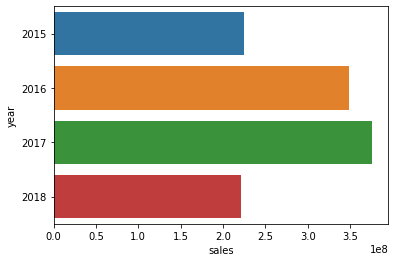

In [56]:
ax = sns.barplot(x="sales", y="year", data=yearly_sales_df) 

## Observations

1) Overall 2017 had most no of sales
2) Overall 2018 had least no of sales

In [57]:
## Monthly analysis
monthly_sales_df = train_df_discounted.groupby(["month"]).agg({"sales":sum}).reset_index()
monthly_sales_df = monthly_sales_df.sort_values(by="sales", ascending=False)
monthly_sales_df

month         sales
2      3  1.130848e+08
0      1  1.117120e+08
11    12  1.085478e+08
5      6  1.079878e+08
4      5  1.050904e+08
3      4  1.020393e+08
1      2  9.246992e+07
10    11  9.137341e+07
9     10  8.998802e+07
8      9  8.905177e+07
6      7  8.448157e+07
7      8  7.582635e+07

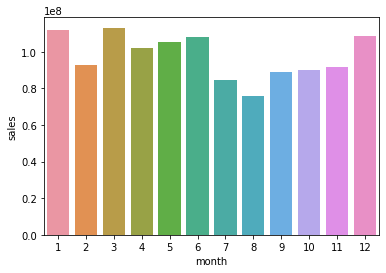

In [58]:
ax = sns.barplot(x="month", y="sales", data = monthly_sales_df)

## Observations

March has the highest sales followed by January and December.
August has the lowest sales

## City-wise Analysis

In [59]:
train_df_discounted_copy_city = train_df_discounted.copy()
city = {4: 'Mumbai', 5: 'Delhi', 7: 'Bangalore', 1: 'Kolkata',
        6: 'Chennai', 8: 'Hyderabad', 9: 'Ahmedabad', 3: 'Jaipur', 10: 'Lucknow', 2: 'Other'}
train_df_discounted_copy_city["city"]=train_df_discounted_copy_city["city"].map(city)
train_df_discounted_copy_city.head()

year month day     city medicine  sales discounted
0  2015     1   2  Kolkata        1   24.0        0.0
1  2015     1   2  Kolkata        2  144.0        0.0
2  2015     1   2  Kolkata        3   84.0        0.0
3  2015     1   2  Kolkata        4   24.0        0.0
4  2015     1   2  Kolkata        5    8.0        0.0

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
def do_city_analysis(df, city):
    city_df = df[df["city"] == city]
    city_df["year"] = city_df["year"].astype("category")
    city_df["month"] = city_df["month"].astype("category")
    city_df["day"] = city_df["day"].astype("category")
    fig_dims = (20, 20)
    f, axes = plt.subplots(nrows=3, ncols=1, figsize = fig_dims)
    yearly_sales_df = city_df.groupby(["year"]).agg({"sales":sum}).reset_index()
    yearly_sales_df = yearly_sales_df.sort_values(by="sales", ascending=False)

    sns.barplot(x="sales", y="year", data=yearly_sales_df, ax=axes[0])

    monthy_sales_df = city_df.groupby(["month"]).agg({"sales":sum}).reset_index()
    monthy_sales_df = monthy_sales_df.sort_values(by="sales", ascending=False)

    sns.barplot(x="sales", y="month", data=monthy_sales_df, ax=axes[1])

    daily_sales_df = city_df.groupby(['day']).agg({"sales":sum}).reset_index()
    daily_sales_df = daily_sales_df.sort_values(by="sales", ascending = False)

    sns.barplot(x="sales", y="day", data=daily_sales_df, ax=axes[2])

    medicine_df = city_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
    medicine_df = medicine_df.sort_values(by="sales", ascending=False)

    zero_sales_meds = medicine_df[medicine_df["sales"]==0]["medicine"]
    print(f"total # of medicenes with zero sale: {len(zero_sales_meds)}")
    plt.show()

In [61]:
import matplotlib.pyplot as plt
def plot_top_meds(df, city, year, top=10):
    df[(df["city"] == city) & (df["year"] == year)].groupby(["medicine"])["sales"].sum().sort_values(ascending = False)[:10].plot.bar()
    plt.xticks(rotation = 45, ha = "right")
    plt.title( f"top {top} medicines sold in {city} in {year}")
    plt.ylabel("sales")
    plt.show()

### Kolkata Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 122


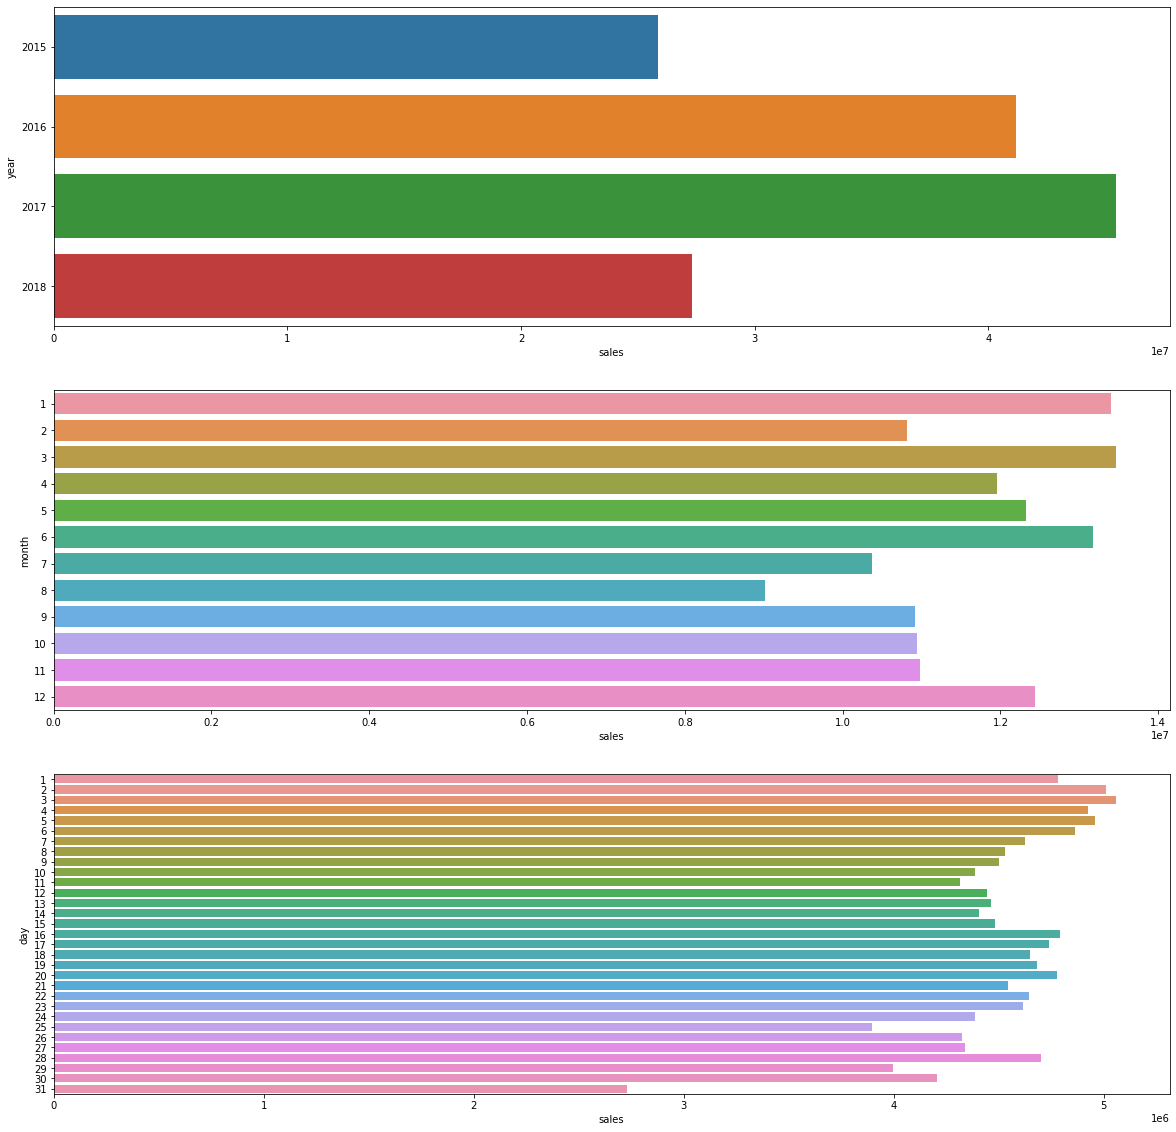

In [62]:
do_city_analysis(train_df_discounted_copy_city,"Kolkata")

### Observations



1.   2017 shows highest sales for kolkata
2.   2015 shows lowest sales for kolkata
3.   For kolkata March has the highest sales followed by    january and july and august has the lowest sales
4.   In Kolkata third day of the month has the most sales followed by second and the
fifth day. 31st day has the lowest sales




## Kolkata Medicine Analysis

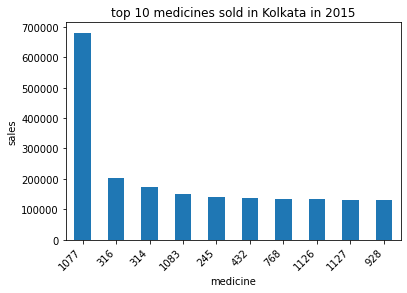

In [63]:
# Top 10 medicines in 2015 in Kolkata
plot_top_meds(train_df_discounted_copy_city, "Kolkata",2015)

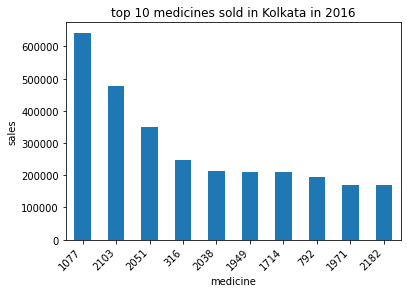

In [64]:
# Top 10 medicines in 2016 in Kolkata
plot_top_meds(train_df_discounted_copy_city, "Kolkata",2016)

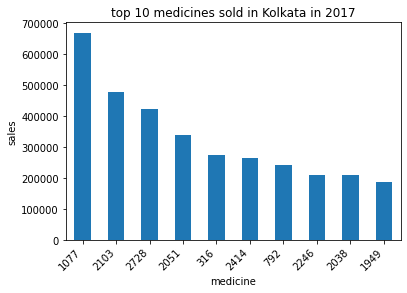

In [65]:
# Top 10 medicines in 2017 in Kolkata
plot_top_meds(train_df_discounted_copy_city, "Kolkata",2017)

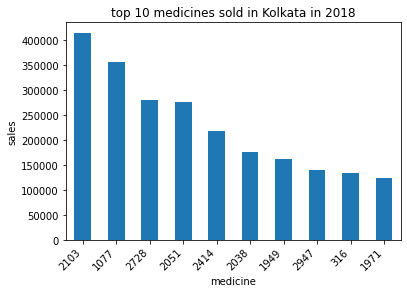

In [66]:
# Top 10 medicines in 2018 in Kolkata
plot_top_meds(train_df_discounted_copy_city, "Kolkata",2018)

In [67]:
kolkata_medicine_df = kolkata_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
kolkata_medicine_df = kolkata_medicine_df.sort_values(by="sales", ascending=False)
kolkata_zero_sales_meds = kolkata_medicine_df[kolkata_medicine_df["sales"]==0]["medicine"]
len(kolkata_zero_sales_meds)

122

## Observations

 1. 1077 is the most sold medicine in kolkata in 2015
 2. 1077 is the most sold medicine in kolkata in 2016
 3. 1077 is the most sold medicine in kolkata in 2017
 4. 2103 is the most sold medicine in kolkata in 2018
 5. There are 122 medicines which have zero sales in kolkata

### Top medicine discount analysis

In [215]:
kolkata_1077 = kolkata_df[kolkata_df["medicine"]==1077]
kolkata_1077_discount = kolkata_1077.groupby(["discounted"]).agg({"sales":sum}).reset_index()
kolkata_1077_discount

discounted      sales
0        0.0  2347556.0
1        1.0        0.0

discount had no role to play in the sales of 1077

## Jaipur Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 138


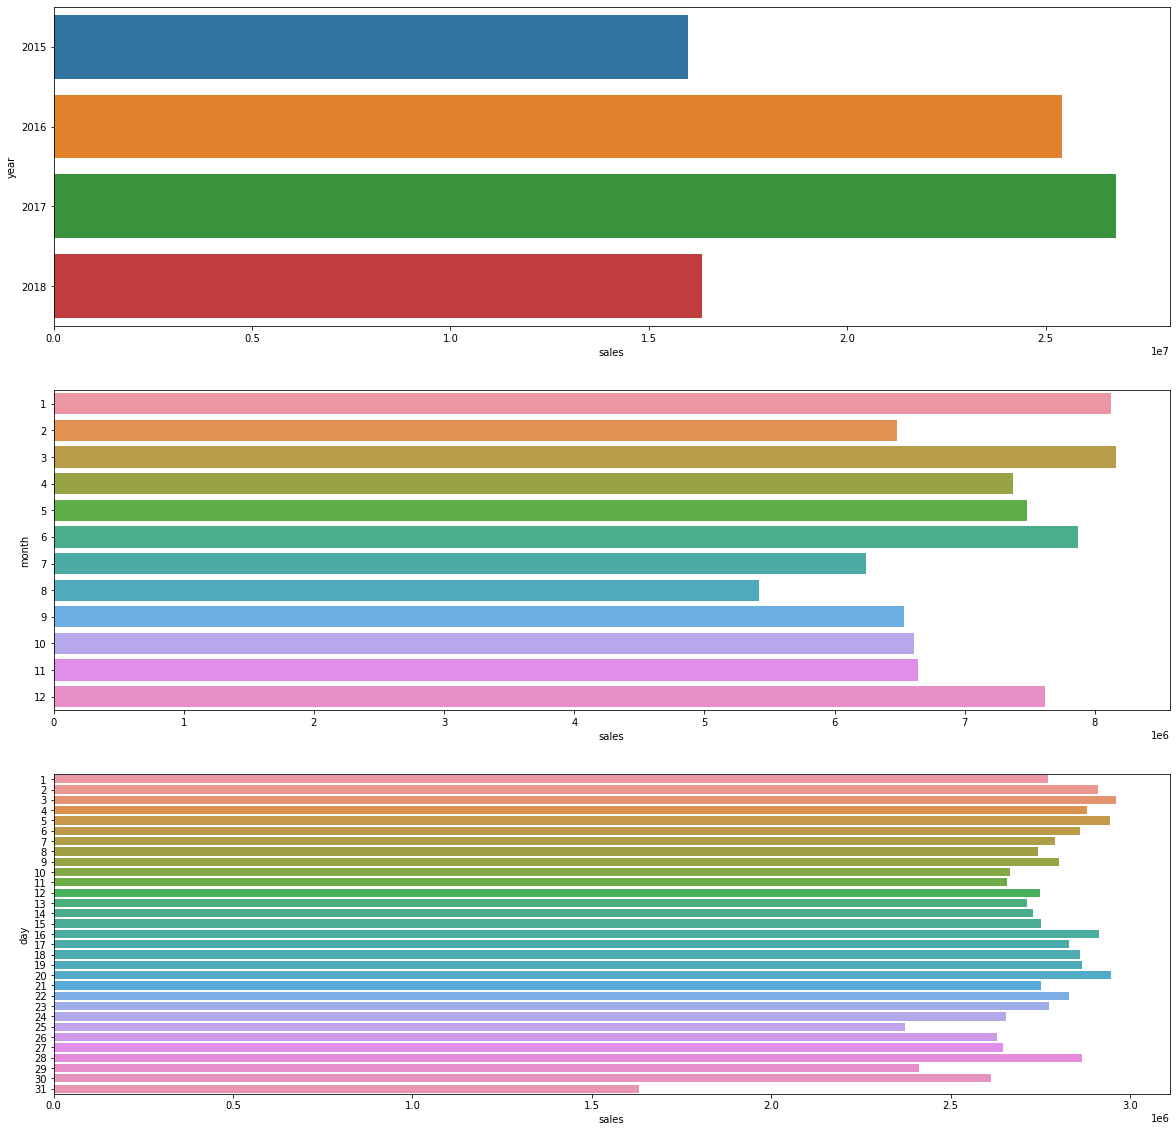

In [68]:
do_city_analysis(train_df_discounted_copy_city, "Jaipur")

### Observations


1.   For Jaipur 2017 has the highest sales followed by 2016 and 2015 has the lowest sales
2.   For Jaipur march has most sales followed by january and June. August has the least sales
3.   For Jaipur Day 3 has the highest sales followed by day 20 and 5. Day 31 has the least sales



## Jaipur Medicine Analysis

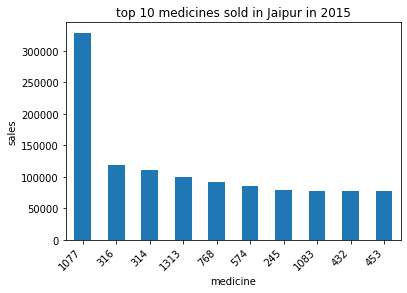

In [69]:
# top 10 medicine in Jaipur in 2015
plot_top_meds(train_df_discounted_copy_city, city="Jaipur", year=2015)

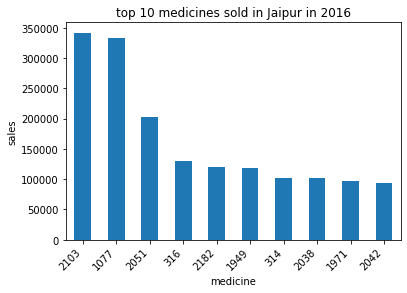

In [70]:
# top 10 medicine in Jaipur in 2016
plot_top_meds(train_df_discounted_copy_city, city="Jaipur", year=2016)

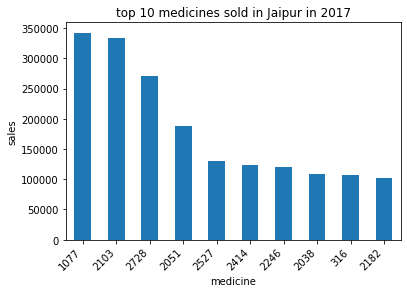

In [71]:
# top 10 medicine in Jaipur in 2017
plot_top_meds(train_df_discounted_copy_city, city="Jaipur", year=2017)

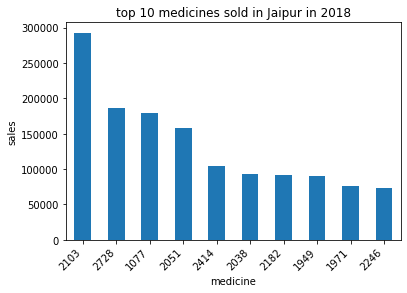

In [72]:
# top 10 medicine in Jaipur in 2018
plot_top_meds(train_df_discounted_copy_city, city="Jaipur", year=2018)

In [73]:
jaipur_medicine_df = jaipur_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
jaipur_medicine_df = jaipur_medicine_df.sort_values(by="sales", ascending=False)
jaipur_zero_sales_meds = jaipur_medicine_df[jaipur_medicine_df["sales"]==0]
jaipur_zero_sales_meds = jaipur_zero_sales_meds["medicine"]
len(jaipur_zero_sales_meds)

138

## Observation

1. In Jaipur medicine 1077 has the highest sales in 2015, 2017.
2. In Jaipur medicine 2103 has the highest sales in 2016, 2018.
3. There are 138 medicines in Jaipur that have 0 sales

### Affect of Discount on top medicine in Jaipur 

In [216]:
jaipur_1077 = jaipur_df[jaipur_df["medicine"]==1077]
jaipur_1077_discount = jaipur_1077.groupby(["discounted"]).agg({"sales":sum}).reset_index()
jaipur_1077_discount

discounted      sales
0        0.0  1182744.0
1        1.0        0.0

In [217]:
jaipur_2103 = jaipur_df[jaipur_df["medicine"]==2103]
jaipur_2103_discount = jaipur_2103.groupby(["discounted"]).agg({"sales":sum}).reset_index()
jaipur_2103_discount

discounted        sales
0        0.0  816653.6108
1        1.0  151199.8400

discount had no role to play in the sales of 1077 in jaipur
discount had a role to play in the sales of 2103 in jaipur

## Mumbai Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 119


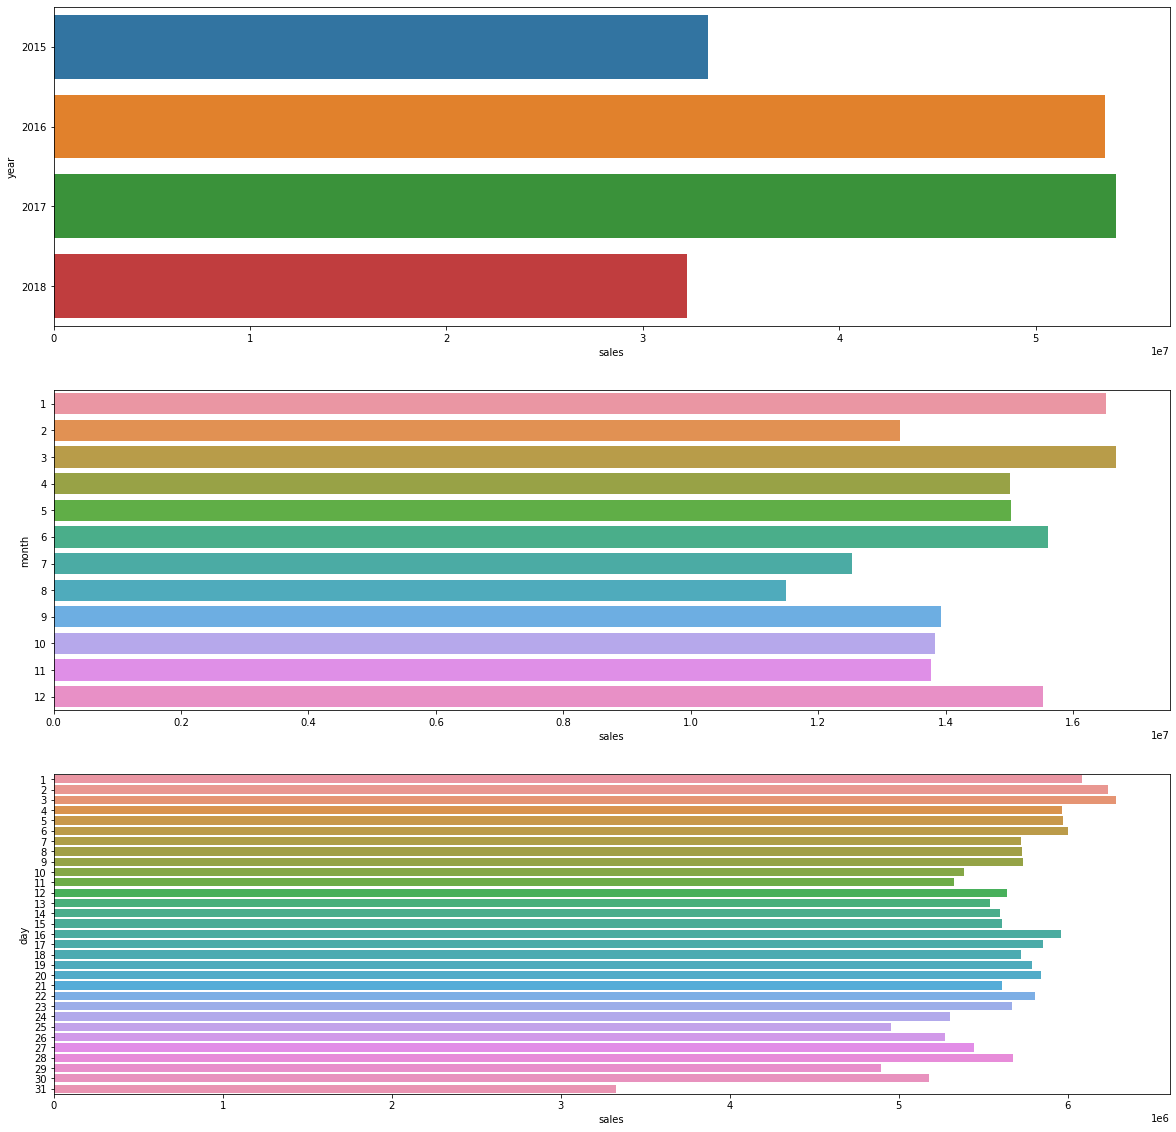

In [74]:
do_city_analysis(train_df_discounted_copy_city, "Mumbai")

## Observations

1. For Mumbai 2017 has most sales followed by 2016 and 2018 has the least sales
2. For Mumbai March has most sales followed by january, June and December. August has the least sales
3. For Mumbai day 3 has the highest sales followed by day 2 and 1. Day 31 has the least sales

## Mumbai Medicine Analysis

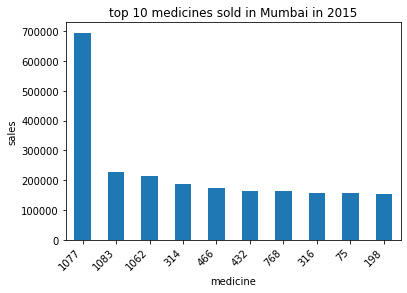

In [75]:
plot_top_meds(train_df_discounted_copy_city, city="Mumbai", year=2015)

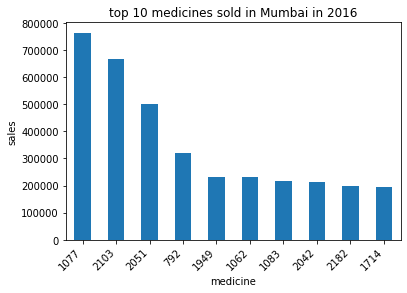

In [76]:
plot_top_meds(train_df_discounted_copy_city, city="Mumbai", year=2016)

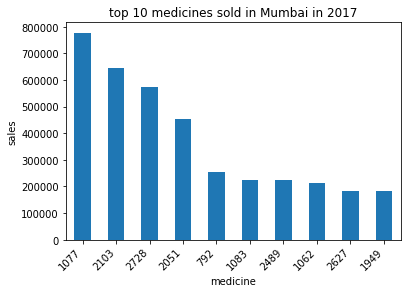

In [77]:
plot_top_meds(train_df_discounted_copy_city, city="Mumbai", year=2017)

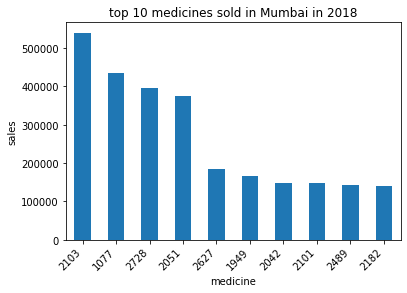

In [78]:
plot_top_meds(train_df_discounted_copy_city, city="Mumbai", year=2018)

In [79]:
mumbai_medicine_df = mumbai_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
mumbai_medicine_df = mumbai_medicine_df.sort_values(by="sales", ascending=False)
mumbai_zero_sales_meds = mumbai_medicine_df[mumbai_medicine_df["sales"]==0]
mumbai_zero_sales_meds = mumbai_zero_sales_meds["medicine"]
len(mumbai_zero_sales_meds)

119

### Observations 


1.   For Mumbai medicine type 1077 has the most sales in 2015 
2.   For Mumbai medicine type 1077 has the most sales in 2016
3.   For Mumbai medicine type 1077 has the most sales in 2017
4.   For Mumbai medicine type 2103 has the most sales in 2018
5.   There are 119 medicines that have zero sales



### Affect of Discount on Top medicine in Mumbai

In [218]:
mumbai_1077 = mumbai_df[mumbai_df["medicine"]==1077]
mumbai_1077_discount = mumbai_1077.groupby(["discounted"]).agg({"sales":sum}).reset_index()
mumbai_1077_discount

discounted      sales
0        0.0  2668956.0
1        1.0        0.0

In [219]:
mumbai_2103 = mumbai_df[mumbai_df["medicine"]==2103]
mumbai_2103_discount = mumbai_2103.groupby(["discounted"]).agg({"sales":sum}).reset_index()
mumbai_2103_discount

discounted         sales
0        0.0  1.556003e+06
1        1.0  2.937758e+05

## Delhi Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 113


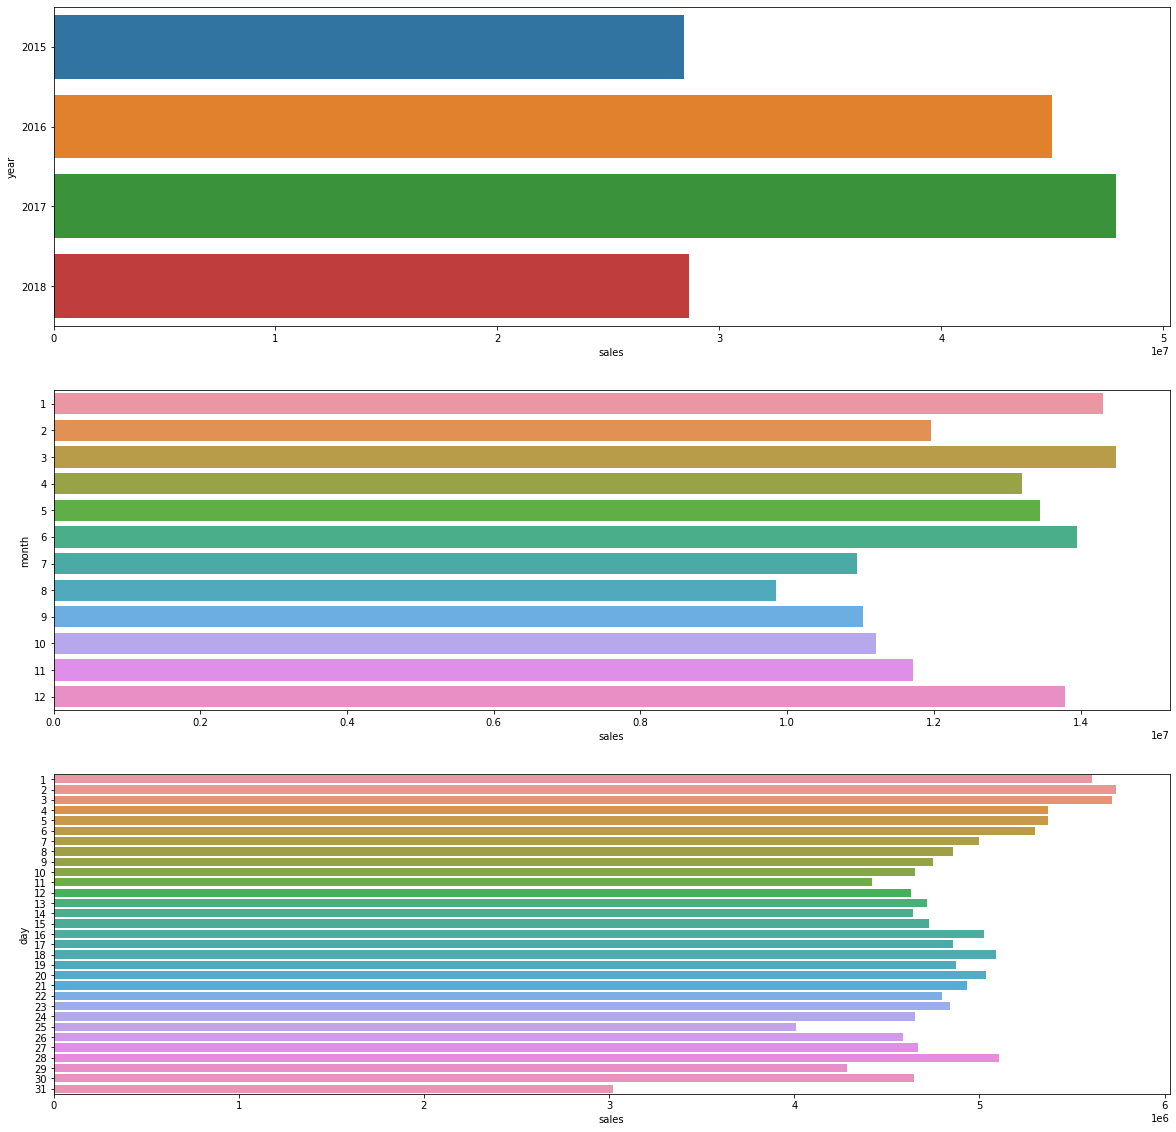

In [80]:
do_city_analysis(train_df_discounted_copy_city, "Delhi")

### Observations
1. For Delhi 2017 has most sales followed by 2016 and 2015 has the least sales
2. March has the most sales followed by jan, june and Dec. Aug has the least sales
3. For Delhi Day 2 has the most no of sales followed by day 3 and 1. Day 31 has the least sales

## Delhi Medicine Analysis

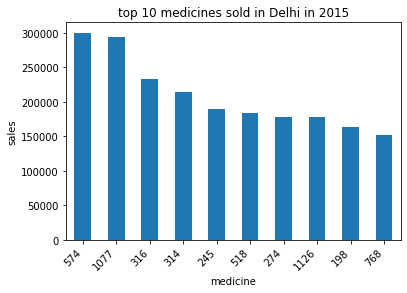

In [81]:
plot_top_meds(train_df_discounted_copy_city, "Delhi", 2015)

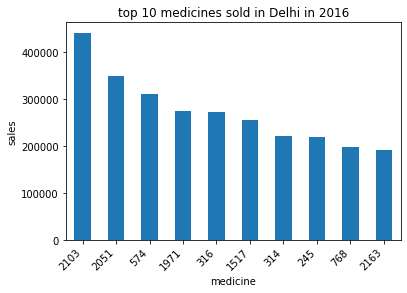

In [82]:
plot_top_meds(train_df_discounted_copy_city, "Delhi", 2016)

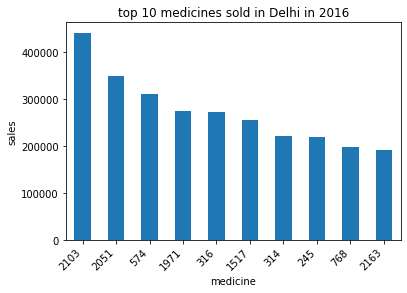

In [83]:
plot_top_meds(train_df_discounted_copy_city, "Delhi", 2016)

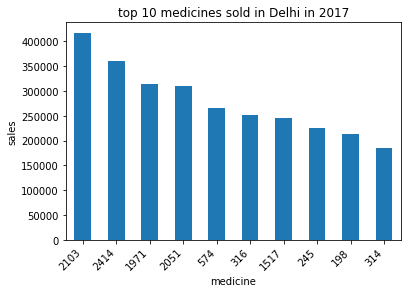

In [84]:
plot_top_meds(train_df_discounted_copy_city, "Delhi", 2017)

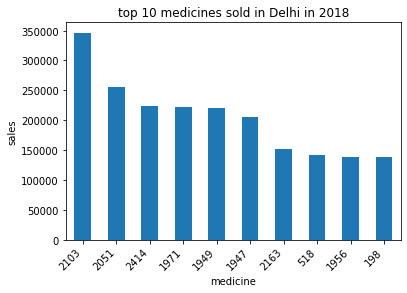

In [85]:
plot_top_meds(train_df_discounted_copy_city, "Delhi", 2018)

In [86]:
delhi_medicine_df = delhi_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
delhi_medicine_df = delhi_medicine_df.sort_values(by="sales",ascending=False)
delhi_zero_sales_meds = delhi_medicine_df[delhi_medicine_df["sales"]==0]
delhi_zero_sales_meds = delhi_zero_sales_meds["medicine"]
len(delhi_zero_sales_meds) 

113

### Observations
1. For Delhi medicine type 574 had the most sales in 2015
2. For Delhi medicine type 2103 had the most sales in 2016
3. For Delhi medicine type 2103 had the most sales in 2017
4. For Delhi medicine type 2103 had the most sales in 2018
5. There are 113 medicines which have zero sales in Delhi

In [220]:
delhi_2103 = delhi_df[delhi_df["medicine"]==2103]
delhi_2103_discount = delhi_2103.groupby(["discounted"]).agg({"sales":sum}).reset_index()
delhi_2103_discount

discounted         sales
0        0.0  1.022572e+06
1        1.0  1.821337e+05

In [221]:
delhi_574 = delhi_df[delhi_df["medicine"]==574]
delh_574_discount = delhi_574.groupby(["discounted"]).agg({"sales":sum}).reset_index()
delh_574_discount

discounted        sales
0        0.0  914752.7636
1        1.0   94581.1240

discount have affect on sales of medicine 574 and 2103 in delhi 

## Chennai Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 136


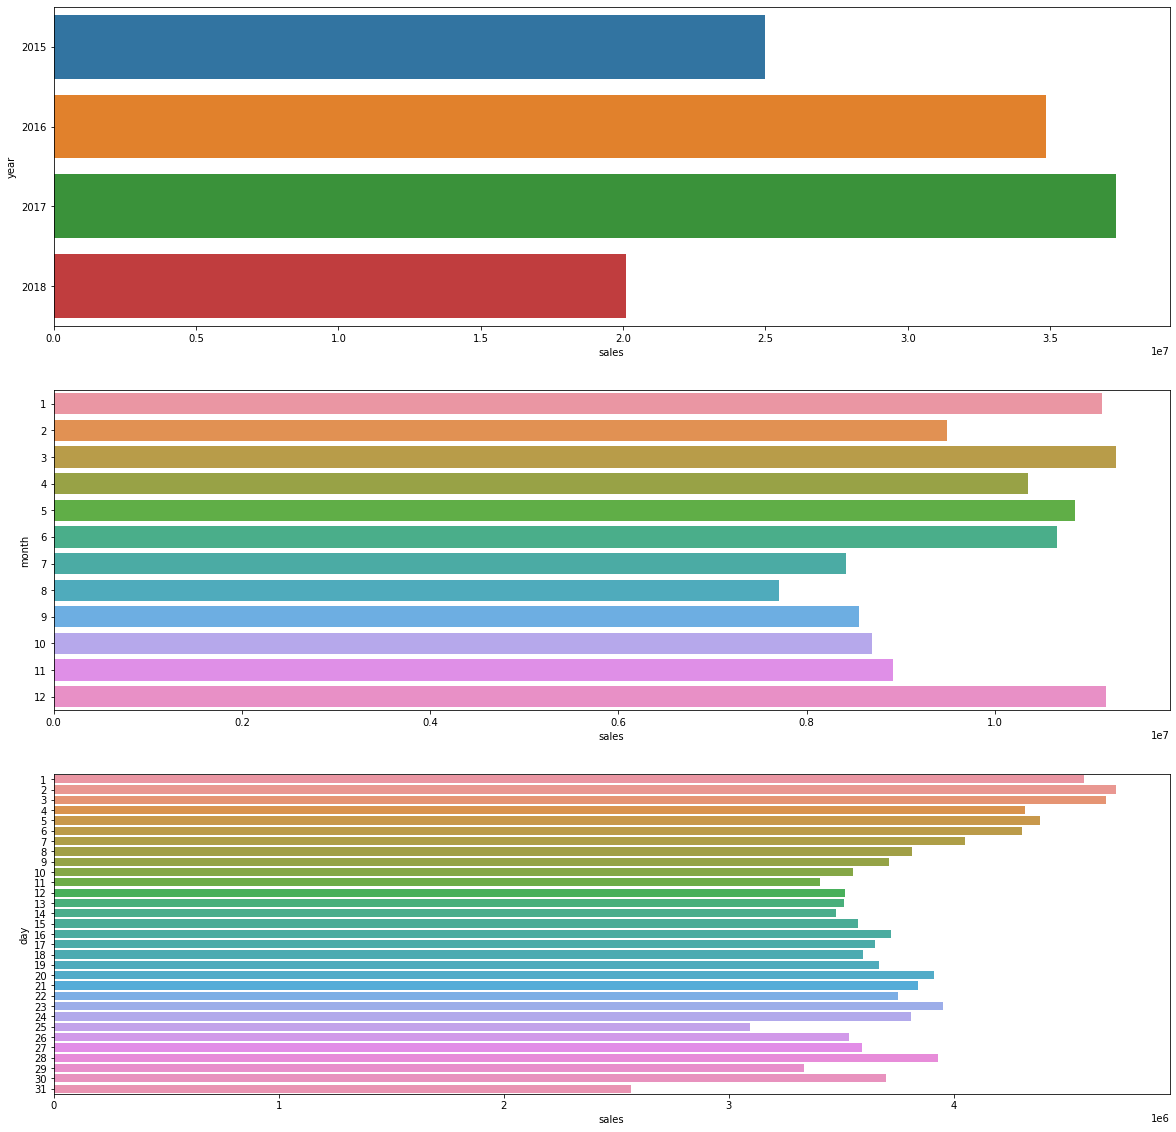

In [87]:
do_city_analysis(train_df_discounted_copy_city, "Chennai")

### Observation
1. For Chennai 2017 has most sale followed by 2016 and 2018 has least no of sales
2. For Chennai March has the most no of sales followed by dec, jan and may. Aug has the least sales
3. for Chennai day 2 has most of the sales followed by day 3, 1 and 5. This implies most of the sale happend during first week of the month

## Chennai Medicine Analysis

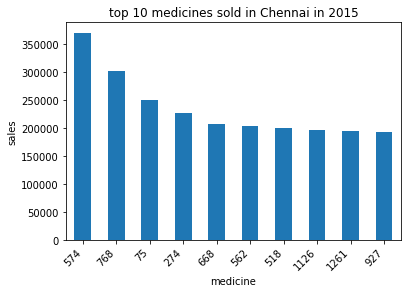

In [88]:
plot_top_meds(train_df_discounted_copy_city, "Chennai", 2015)

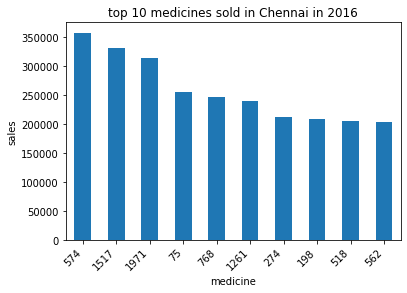

In [89]:
plot_top_meds(train_df_discounted_copy_city, "Chennai", 2016)

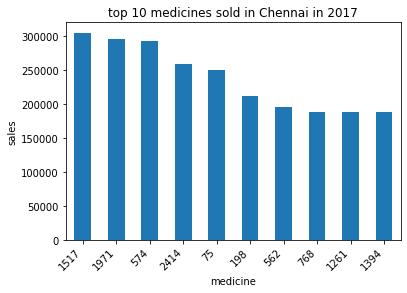

In [90]:
plot_top_meds(train_df_discounted_copy_city, "Chennai", 2017)

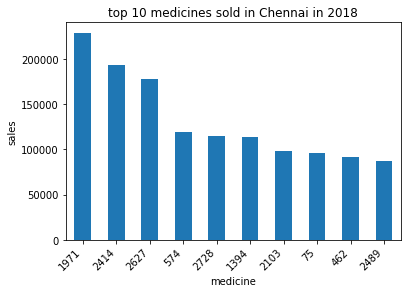

In [91]:
plot_top_meds(train_df_discounted_copy_city, "Chennai", 2018)

In [92]:
chennai_medicine_df = chennai_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
chennai_medicine_df = chennai_medicine_df.sort_values(by="sales", ascending=False)
chennai_zero_sales_meds = chennai_medicine_df[chennai_medicine_df["sales"]==0]
chennai_zero_sales_meds = chennai_zero_sales_meds["medicine"]
len(chennai_zero_sales_meds)

136

### Observation
1. For Chennai medicine type 574 has most sales in 2015
2. For Chennai medicine type 574 has most sales in 2016
3. For Chennai medicine type 1517 has most sales in 2017
4. For Chennai medicine type 1971 has most sales in 2018
5. For Chennai there are 136 medicine that  have zero sales

### Affect of discount on top medicine in Chennai

In [222]:
chennai_574 = chennai_df[chennai_df["medicine"]==574]
chennai_574_discount = chennai_574.groupby(["discounted"]).agg({"sales":sum}).reset_index()
chennai_574_discount

discounted         sales
0        0.0  1.040865e+06
1        1.0  9.847642e+04

In [223]:
chennai_1517 = chennai_df[chennai_df["medicine"]==1517]
chennai_1517_discount = chennai_1517.groupby(["discounted"]).agg({"sales":sum}).reset_index()
chennai_1517_discount

discounted     sales
0        0.0  843940.0
1        1.0       0.0

In [224]:
chennai_1971 = chennai_df[chennai_df["medicine"]==1971]
chennai_1971_discount = chennai_1971.groupby(["discounted"]).agg({"sales":sum}).reset_index()
chennai_1971_discount

discounted     sales
0        0.0  838240.0
1        1.0       0.0

1. discount has affect on the sales of 574 in chennai
2. discount has no affect on the sales of 1971, 1517 in chennai

## Bengaluru Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 115


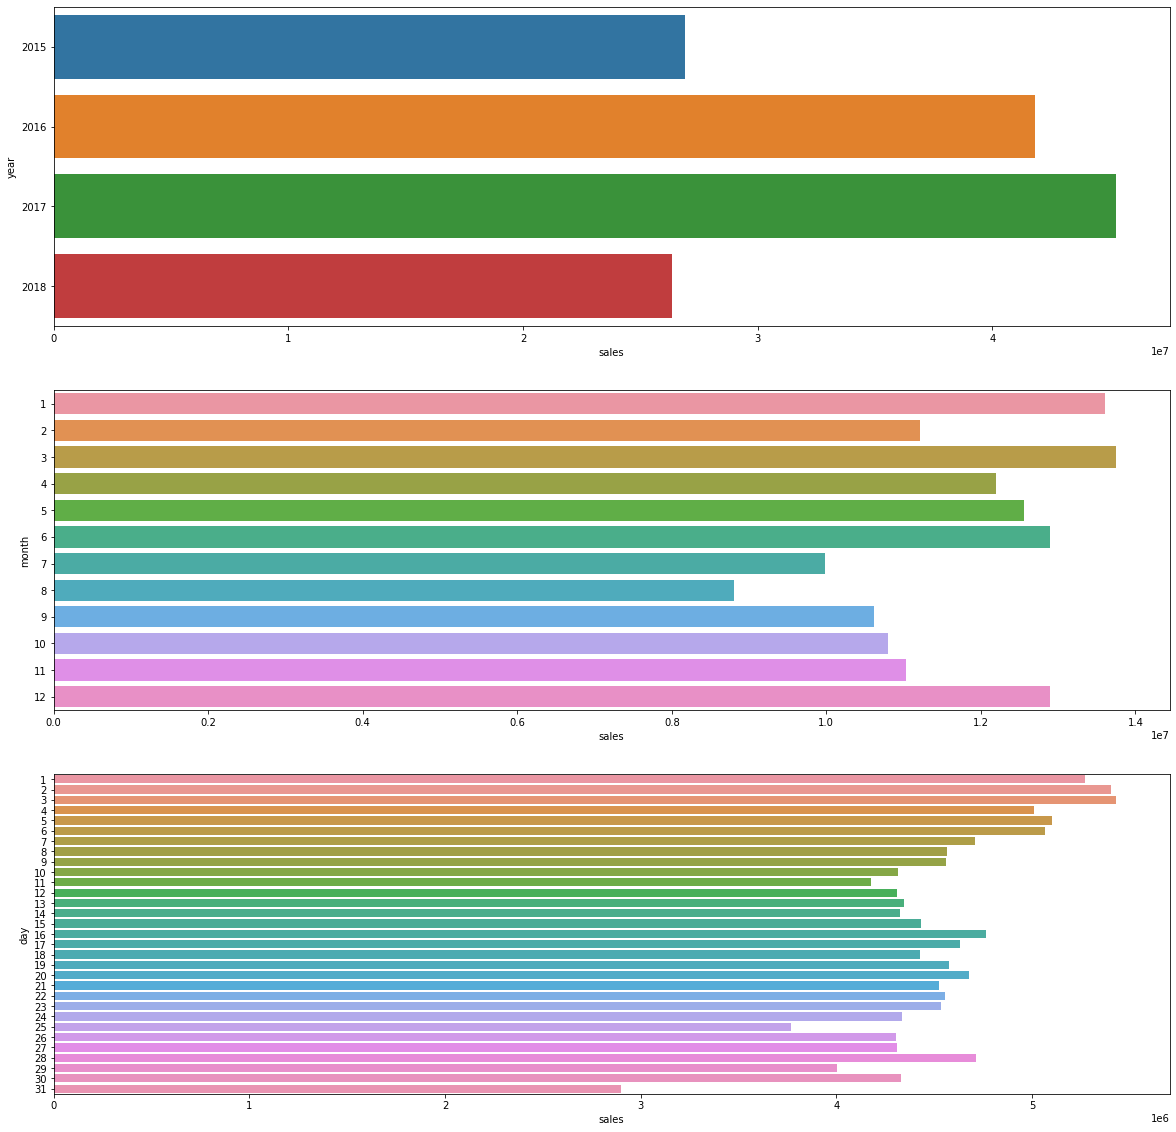

In [93]:
do_city_analysis(train_df_discounted_copy_city, "Bangalore")

### Observations
1. For Bengaluru 2017 has most sale followed by 2016 and 2018 has least sales
2. For Bengaluru March had most no of sales followed by jan, Dec and June. Aug has least no of sales
3. For Bengaluru Day 3 has most no of sale followed by day 2, 1 and 5. This implies most sales happen during the first week of the month

## Bengaluru Medicine Analysis

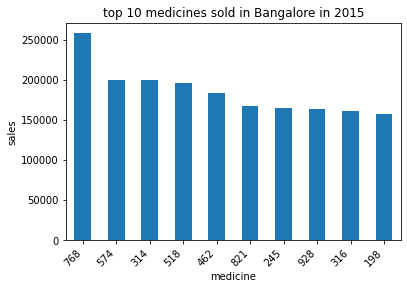

In [94]:
plot_top_meds(train_df_discounted_copy_city, "Bangalore", 2015)

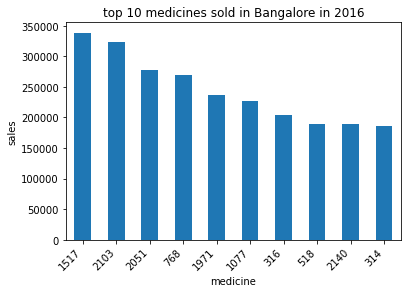

In [95]:
plot_top_meds(train_df_discounted_copy_city, "Bangalore", 2016)

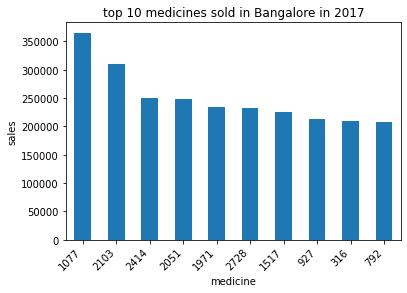

In [96]:
plot_top_meds(train_df_discounted_copy_city, "Bangalore", 2017)

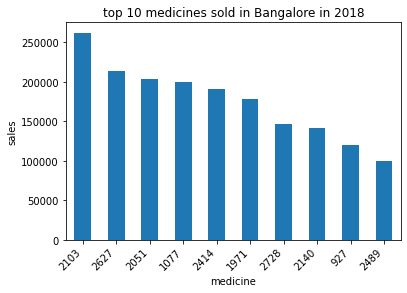

In [97]:
plot_top_meds(train_df_discounted_copy_city, "Bangalore", 2018)

In [98]:
bengaluru_medicine_df = bengaluru_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
bengaluru_medicine_df = bengaluru_medicine_df.sort_values(by="sales", ascending= False)
bengaluru_zero_sales_meds = bengaluru_medicine_df[bengaluru_medicine_df["sales"]==0]
bengaluru_zero_sales_meds =bengaluru_zero_sales_meds["medicine"]
len(bengaluru_zero_sales_meds)

115

In [99]:
bengaluru_medicine_df.head()

medicine        sales
1076     1077  947248.0000
2102     2103  894826.7488
767       768  776580.0000
1516     1517  768468.0000
2050     2051  730932.1544

### Observations
1. For Bengaluru medicine type 768 has most sales in 2015
2. For Bengaluru medicine type 1517 has most sales in 2016
3. For Bengaluru medicine type 1077 has most sales in 2017
4. For Bengaluru medicine type 2103 has most sales in 2018
5. For Bengaluru there are 115 medicines that have zero sales


In [225]:
bengaluru_768 = bengaluru_df[bengaluru_df["medicine"]==768]
bengaluru_768_discount = bengaluru_768.groupby(["discounted"]).agg({"sales":sum}).reset_index()
bengaluru_768_discount

discounted     sales
0        0.0  776580.0
1        1.0       0.0

In [226]:
bengaluru_1517 = bengaluru_df[bengaluru_df["medicine"]==1517]
bengaluru_1517_discount = bengaluru_1517.groupby(["discounted"]).agg({"sales":sum}).reset_index()
bengaluru_1517_discount

discounted     sales
0        0.0  768468.0
1        1.0       0.0

In [227]:
bengaluru_1077 = bengaluru_df[bengaluru_df["medicine"]==1077]
bengaluru_1077_discount = bengaluru_1077.groupby(["discounted"]).agg({"sales":sum}).reset_index()
bengaluru_1077_discount

discounted     sales
0        0.0  947248.0
1        1.0       0.0

In [228]:
bengaluru_2103 = bengaluru_df[bengaluru_df["medicine"]==2103]
bengaluru_2103_discount = bengaluru_2103.groupby(["discounted"]).agg({"sales":sum}).reset_index()
bengaluru_2103_discount

discounted        sales
0        0.0  766870.3528
1        1.0  127956.3960

1. discount has no affect on sales for medicine 768, 1517, 1077 in bengaluru
2. discount has affect on sales for medicine 2103 in bengaluru

## Hyderabad Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 152


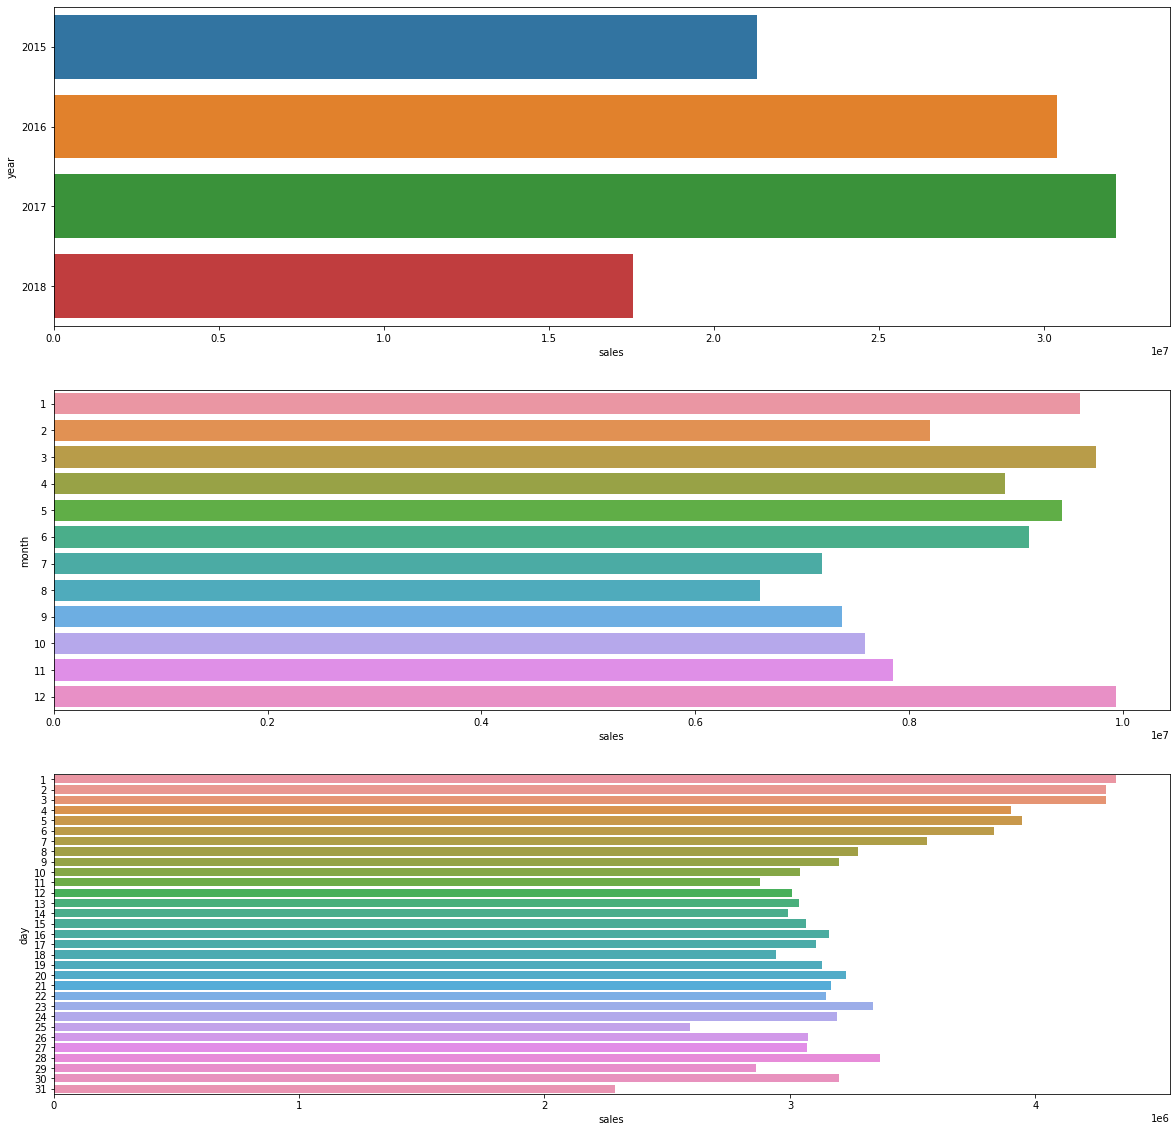

In [100]:
do_city_analysis(train_df_discounted_copy_city, "Hyderabad")

### Observations 
1. For Hyderabad 2017 show most sales followed by 2016 and 2018 has least sales
2. For Hyderbad Dec has most no of sales followed by march, jan and May. Aug has least sales
3. For Hyderabad Day 1 has the most sale followed by day 3 and 2 and day 31 has the least sales

## Hyderabad Medicine Analysis

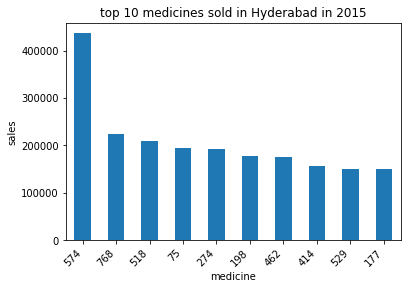

In [101]:
plot_top_meds(train_df_discounted_copy_city, "Hyderabad", 2015)

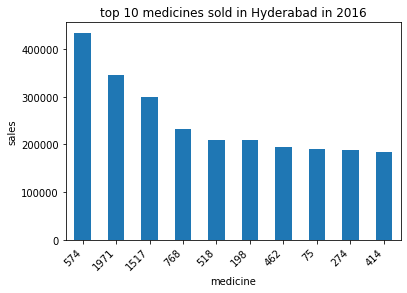

In [102]:
plot_top_meds(train_df_discounted_copy_city, "Hyderabad", 2016)

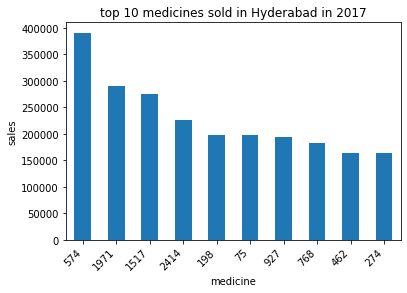

In [103]:
plot_top_meds(train_df_discounted_copy_city, "Hyderabad", 2017)

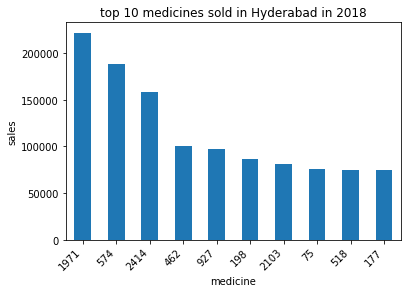

In [104]:
plot_top_meds(train_df_discounted_copy_city, "Hyderabad", 2018)

In [105]:
hyderabad_medicine_df = hyderabad_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
hyderabad_medicine_df = hyderabad_medicine_df.sort_values(by="sales", ascending= False)
hyderabad_zero_sales_meds = hyderabad_medicine_df[hyderabad_medicine_df["sales"]==0]
hyderabad_zero_sales_meds = hyderabad_zero_sales_meds["medicine"]
len(hyderabad_zero_sales_meds)

152

In [106]:
hyderabad_medicine_df.head() 

medicine         sales
573       574  1.449808e+06
1970     1971  8.561400e+05
1516     1517  7.307400e+05
767       768  6.969520e+05
197       198  6.703080e+05

### Observations 
1. For Hyderabad medicine type 574 had most sales in 2015
2. For Hyderabad medicine type 574 had most sales in 2016
3. For Hyderabad medicine type 574 had most sales in 2017
4. For Hyderabad medicine type 1971 had most sales in 2018
5. For Hyderabd there were total 152 medicines that had zero sales 

In [229]:
hyderabad_574 = hyderabad_df[hyderabad_df["medicine"]==574]
hyderabad_574_discount = hyderabad_574.groupby(["discounted"]).agg({"sales":sum}).reset_index()
hyderabad_574_discount

discounted         sales
0        0.0  1.296574e+06
1        1.0  1.532346e+05

In [230]:
hyderabad_1971 = hyderabad_df[hyderabad_df["medicine"]==1971]
hyderabad_1971_discount = hyderabad_1971.groupby(["discounted"]).agg({"sales":sum}).reset_index()
hyderabad_1971_discount

discounted     sales
0        0.0  856140.0
1        1.0       0.0

1. discount has affect on sales of medicine 574 in hyderabad
2. discount has no affect on sales of medicine 1971 in hyderabad


## Ahemdabad Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 128


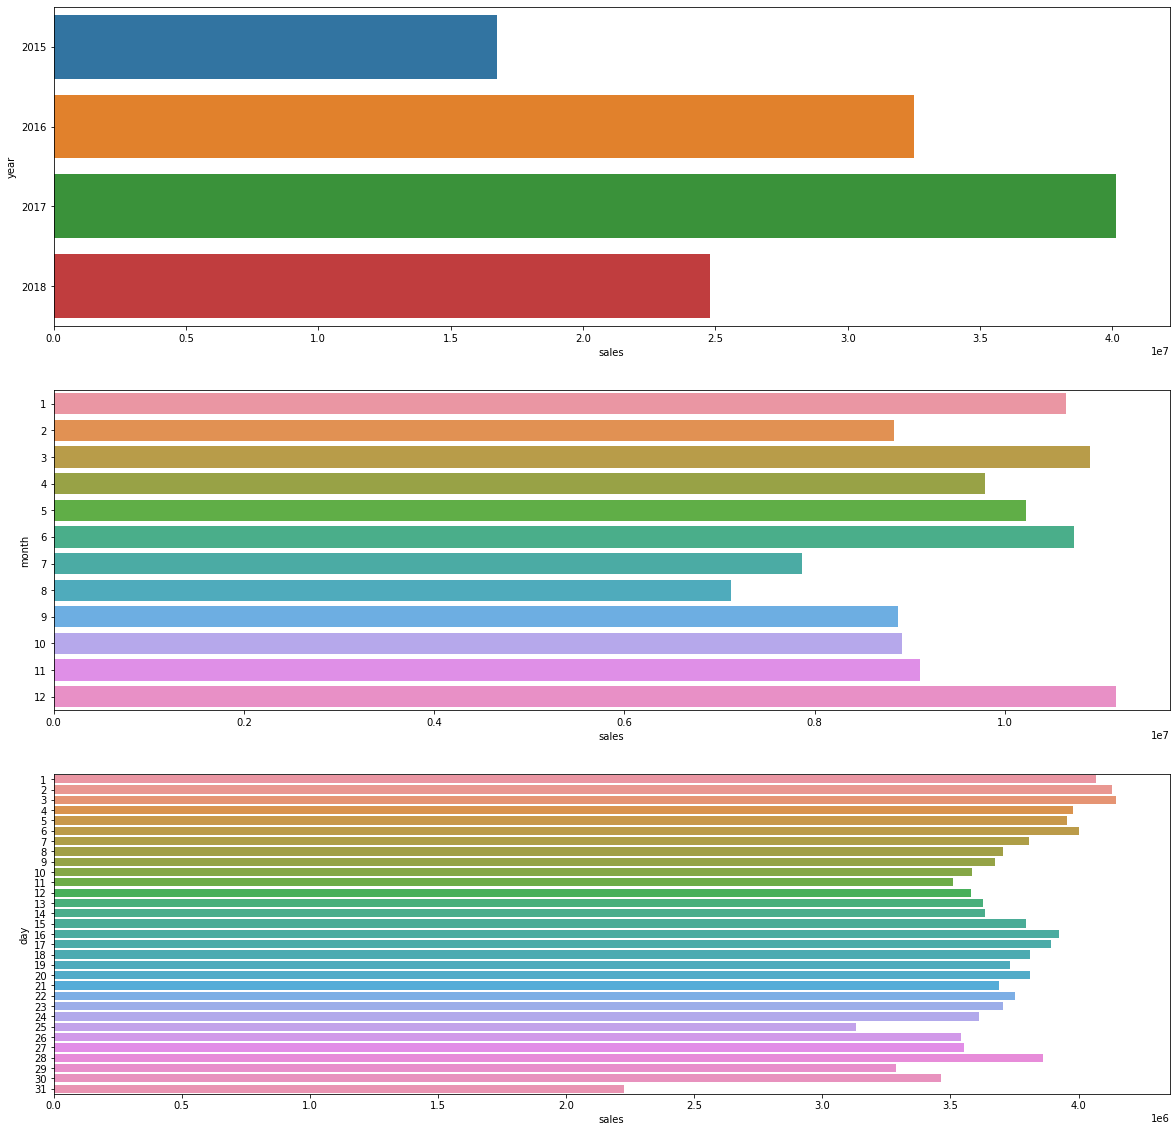

In [107]:
do_city_analysis(train_df_discounted_copy_city, "Ahmedabad")

### Observations 
1. for Ahemdabad 2017 had most sales followed by 2016 and 2015 had least sales
2. For Ahemdabad December has most sales followed by March, June and Jan. Aug has the least sale
3. For Ahemdabad day 3 had most sales followed by day 2, 1 and 6 and day 31 has least sales

## Ahemdabad Medicine Analysis

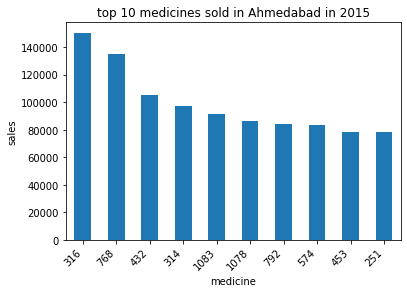

In [108]:
plot_top_meds(train_df_discounted_copy_city, "Ahmedabad", 2015)

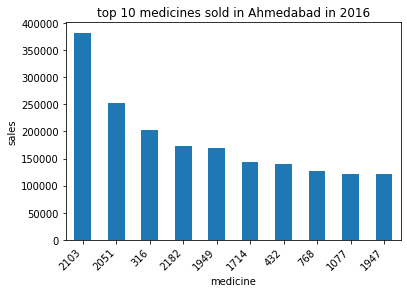

In [109]:
plot_top_meds(train_df_discounted_copy_city, "Ahmedabad", 2016)

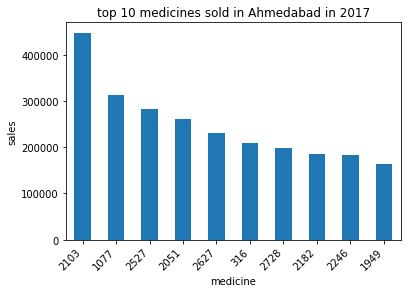

In [110]:
plot_top_meds(train_df_discounted_copy_city, "Ahmedabad", 2017)

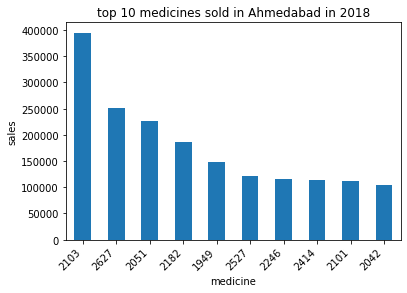

In [111]:
plot_top_meds(train_df_discounted_copy_city, "Ahmedabad", 2018)

In [112]:
ahemdabad_medicine_df = ahemdabad_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
ahemdabad_medicine_df = ahemdabad_medicine_df.sort_values(by="sales",ascending= False)
ahemdabad_zero_sales_meds = ahemdabad_medicine_df[ahemdabad_medicine_df["sales"]==0]
ahemdabad_zero_sales_meds = ahemdabad_zero_sales_meds["medicine"]
len(ahemdabad_zero_sales_meds)

128

In [113]:
ahemdabad_medicine_df.head()

medicine         sales
2102     2103  1.225045e+06
2050     2051  7.397172e+05
315       316  6.611920e+05
1076     1077  5.609440e+05
2181     2182  5.436219e+05

### Observations
1. For Ahmedabad medicine type 316 had most sales in 2015
2. For Ahmedabad medicine type 2103 had most sales in 2016
3. For Ahmedabad medicine type 2103 had most sales in 2017
4. For Ahmedabad medicine type 2103 had most sales in 2018
5. For Ahmedabad there are 128 medicines that had zero sales

In [231]:
ahemdabad_316 = ahemdabad_df[ahemdabad_df["medicine"]==316]
ahemdabad_316_discount = ahemdabad_316.groupby(["discounted"]).agg({"sales":sum}).reset_index()
ahemdabad_316_discount

discounted     sales
0        0.0  589144.0
1        1.0   72048.0

In [232]:
ahemdabad_2103 = ahemdabad_df[ahemdabad_df["medicine"]==2103]
ahemdabad_2103_discount = ahemdabad_2103.groupby(["discounted"]).agg({"sales":sum}).reset_index()
ahemdabad_2103_discount

discounted         sales
0        0.0  1.041726e+06
1        1.0  1.833195e+05

1. discount has affect on sales of medicines 316 and 2103 in ahemdabad

## Lucknow Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 135


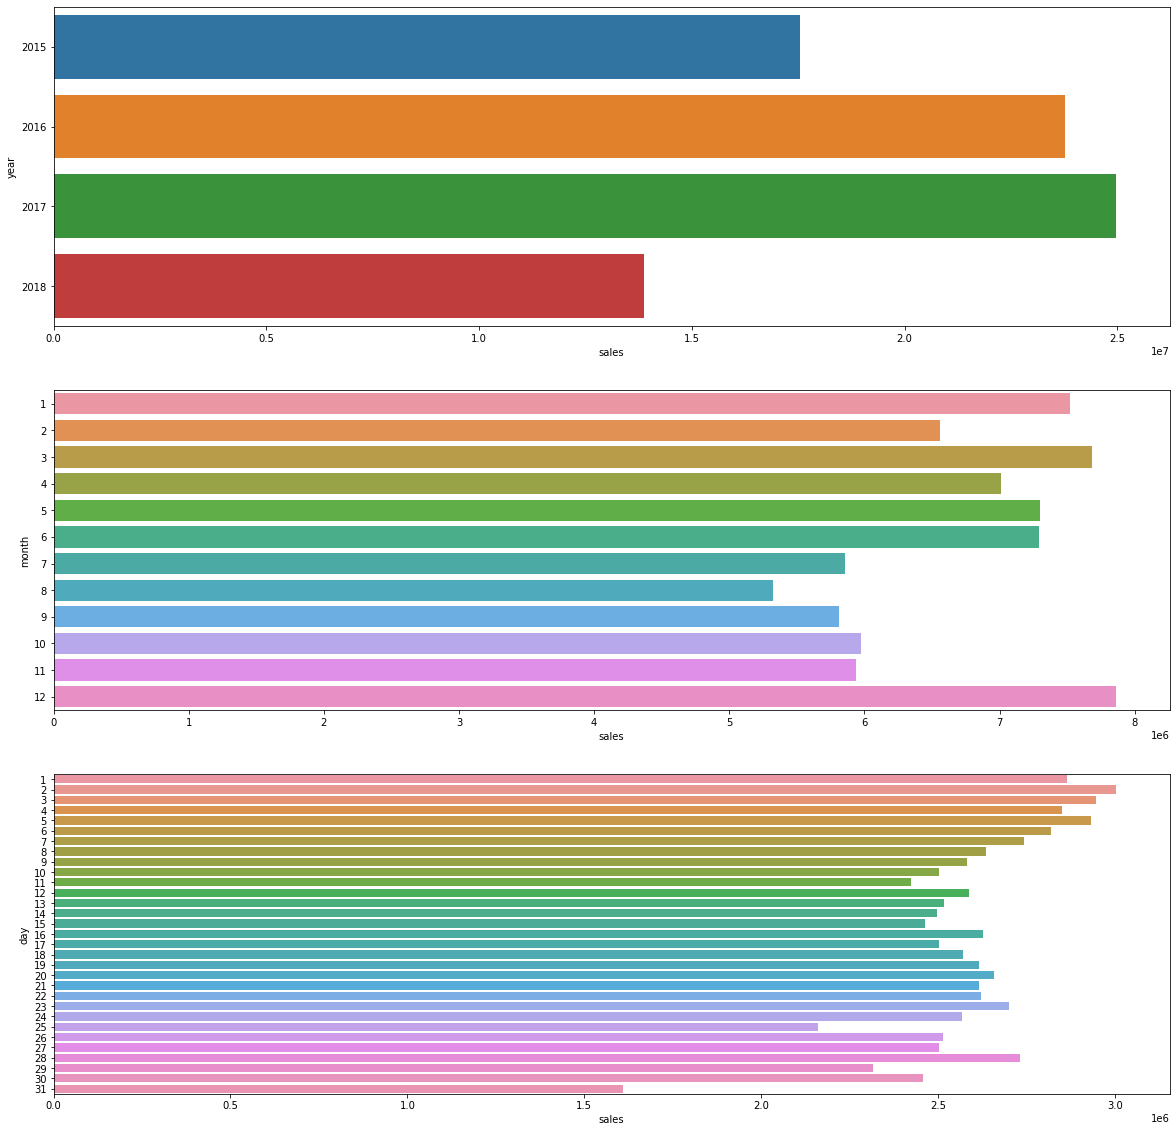

In [114]:
do_city_analysis(train_df_discounted_copy_city, "Lucknow")

### Observations 
1. For lucknow 2017 had most sales followed by 2016 and 2018 had least sales
2. For Lucknow December has the most sales followed by March, Jan and May. Aug had the least sale
3. For Lucknow day 2 has most sales followed by day 3, 5, 1 and  Day 31 has the least sales

## Lucknow Medicine Analysis

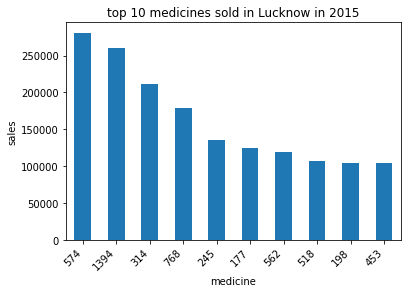

In [115]:
plot_top_meds(train_df_discounted_copy_city, "Lucknow", 2015)

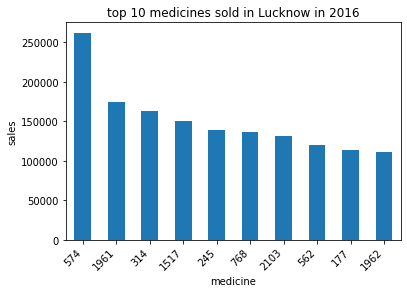

In [116]:
plot_top_meds(train_df_discounted_copy_city, "Lucknow", 2016)

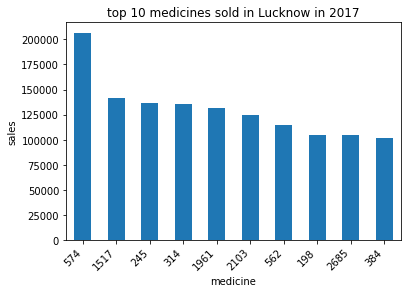

In [117]:
plot_top_meds(train_df_discounted_copy_city, "Lucknow", 2017)

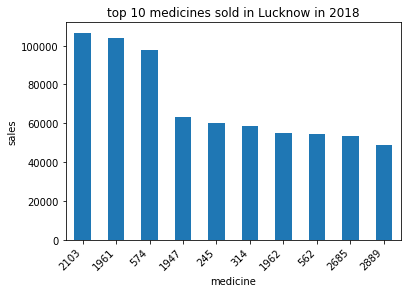

In [118]:
plot_top_meds(train_df_discounted_copy_city, "Lucknow", 2018)

In [119]:
lucknow_medicine_df = lucknow_df.groupby("medicine").agg({"sales":sum}).reset_index()
lucknow_medicine_df = lucknow_medicine_df.sort_values(by="sales", ascending = False)
lucknow_zero_sales_meds = lucknow_medicine_df[lucknow_medicine_df["sales"]==0]
lucknow_zero_sales_meds = lucknow_zero_sales_meds["medicine"]
len(lucknow_zero_sales_meds)

135

In [120]:
lucknow_medicine_df.head()

medicine        sales
573       574  848311.4908
313       314  569576.0000
244       245  471860.0000
767       768  450944.0000
1960     1961  409980.0000

### Observations
1. For Lucknow medicine type 574 had most sales in 2015
2. For Lucknow medicine type 574 had most sales in 2016
3. For Lucknow medicine type 574 had most sales in 2017
4. For Lucknow medicine type 2103 had most sales in 2018
5. For Lucknow there are 135 medicines that had zero sales


In [233]:
lucknow_574 = lucknow_df[lucknow_df["medicine"]==574]
lucknow_574_discount = lucknow_574.groupby(["discounted"]).agg({"sales":sum}).reset_index()
lucknow_574_discount

discounted        sales
0        0.0  774669.2628
1        1.0   73642.2280

In [234]:
lucknow_2103 = lucknow_df[lucknow_df["medicine"]==2103]
lucknow_2103_discount = lucknow_2103.groupby(["discounted"]).agg({"sales":sum}).reset_index()
lucknow_2103_discount

discounted        sales
0        0.0  315547.4392
1        1.0   47139.6120

discount has affect on the sales of medicine 574 and 2103 in lucknow

## Others Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

total # of medicenes with zero sale: 186


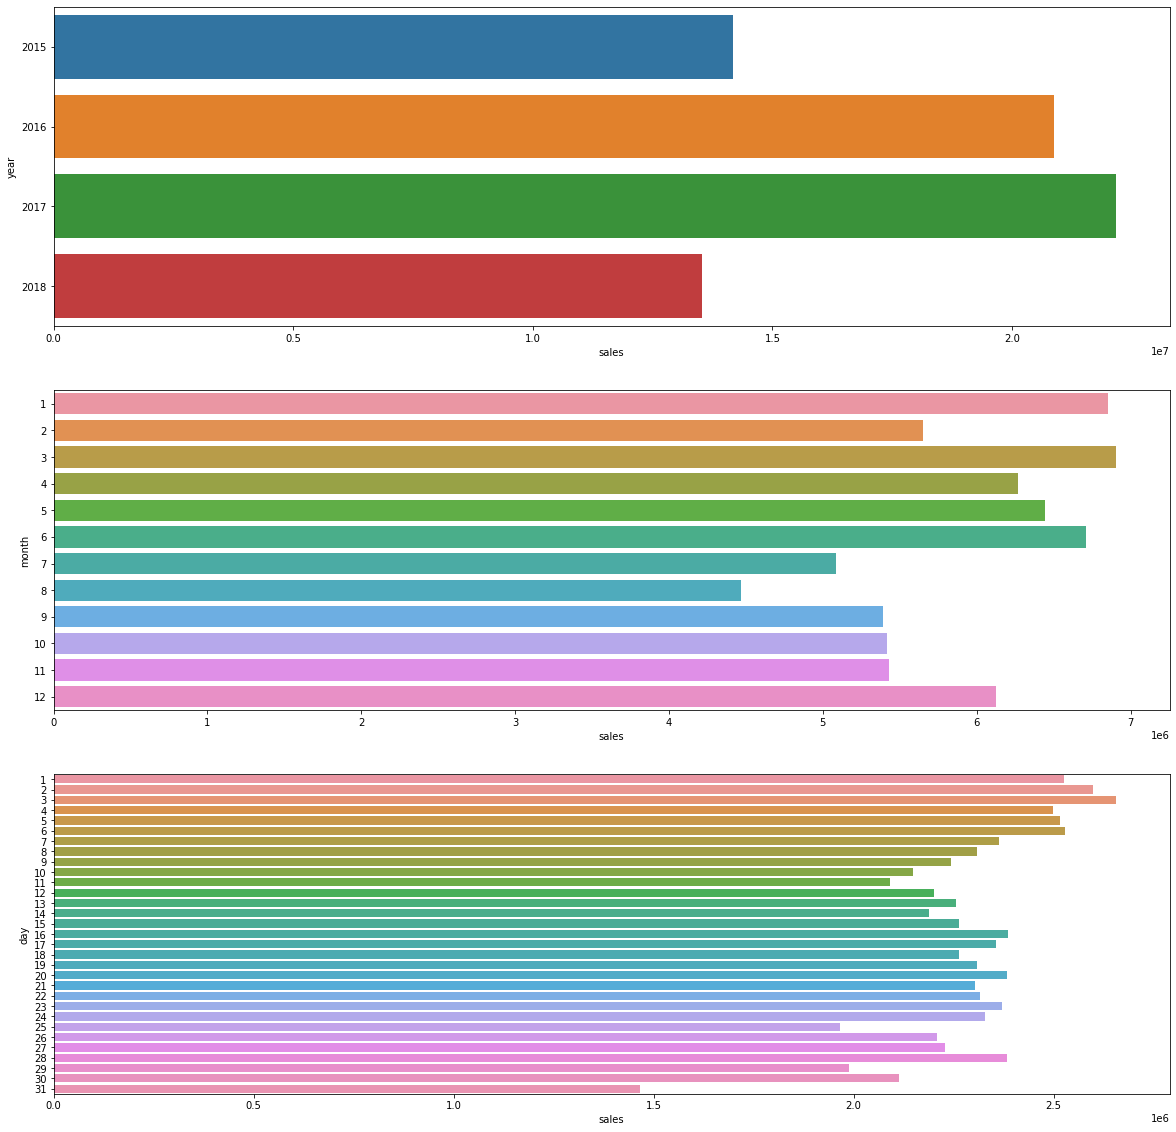

In [121]:
do_city_analysis(train_df_discounted_copy_city, "Other")

### Observations 
1. for other cities 2017 has most sales followed by 2016 and 2018 has the least sales
2. For Other cities March had the most sale followed by Jan , june and May. Aug had the least sales
3. For Other cities day 3 has most number of sales followed by day 2, 6 and 1. Day 31 has least number of sale

For Other cities day 3 has most number of sales followed by day 2, 6 and 1. Day 31 has least number of sale

## Other City Medicine Analysis

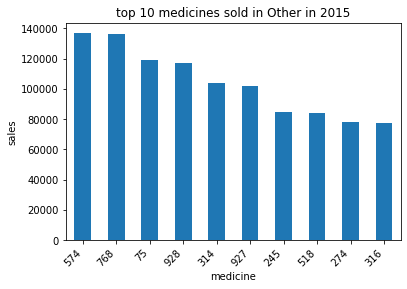

In [122]:
plot_top_meds(train_df_discounted_copy_city,"Other", 2015)

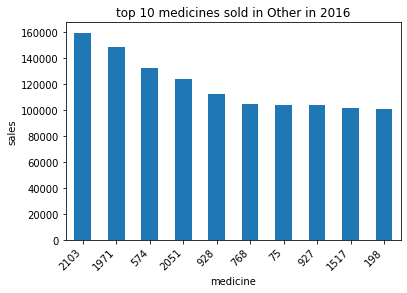

In [123]:
plot_top_meds(train_df_discounted_copy_city,"Other", 2016)

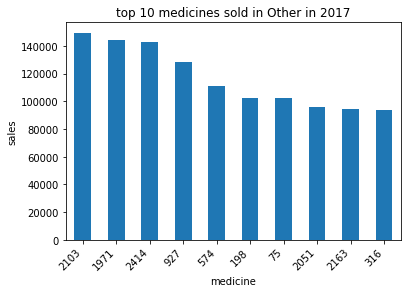

In [124]:
plot_top_meds(train_df_discounted_copy_city,"Other", 2017)

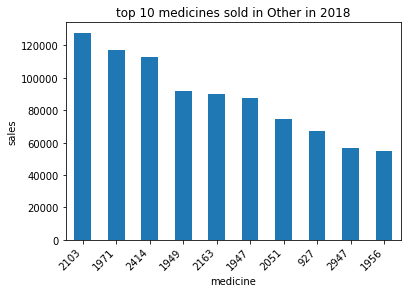

In [125]:
plot_top_meds(train_df_discounted_copy_city,"Other", 2018)

In [126]:
other_medicine_df = other_df.groupby("medicine").agg({"sales":sum}).reset_index()
other_medicine_df = other_medicine_df.sort_values(by="sales", ascending = False)
other_zero_sales_meds = other_medicine_df[other_medicine_df["sales"]==0]
other_zero_sales_meds = other_zero_sales_meds["medicine"]
len(other_zero_sales_meds)

186

In [127]:
other_medicine_df.head()

medicine        sales
2102     2103  437363.1856
573       574  430996.9884
1970     1971  410312.0000
926       927  401169.0960
74         75  369921.7084

### Observations
1. For Other cities medicine type 574 had most sales in 2015
2. For Other cities medicine type 2103 had most sales in 2016
3. For Other cities medicine type 2103 had most sales in 2017
4. For Other cities medicine type 2103 had most sales in 2018
5. For other cities there were 186 medicines that had zero sales

## Overall City Analysis

In [128]:
city_total_df = train_df_discounted.groupby(["city"]).agg({"sales":sum}).reset_index()
city_total_df = city_total_df.sort_values(by="sales", ascending=False)
city_total_df

city         sales
3    4  1.732036e+08
4    5  1.499212e+08
6    7  1.403648e+08
0    1  1.398109e+08
5    6  1.172383e+08
8    9  1.141836e+08
7    8  1.015072e+08
2    3  8.452790e+07
9   10  8.013665e+07
1    2  7.075905e+07

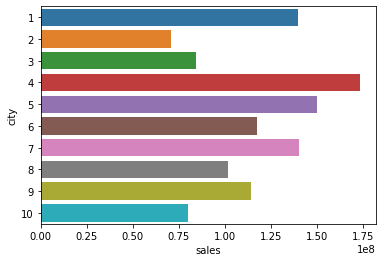

In [129]:
ax = sns.barplot(x="sales", y="city", data=city_total_df)
# Mumbai has highest sales 
# Other cities have least sales

## Observation

Mumbai has most sales followed by Delhi and Bengaluru

## Overall Medicine Analysis

In [130]:
overall_medicine_df = train_df_discounted.groupby("medicine").agg({"sales":sum}).reset_index()
overall_medicine_df = overall_medicine_df.sort_values(by="sales", ascending = False)
overall_medicine_df.head() 

medicine         sales
1076     1077  9.438928e+06
2102     2103  8.951431e+06
573       574  6.874141e+06
2050     2051  6.203184e+06
315       316  5.245512e+06

In [131]:
overall_medicine_df.tail() 

medicine  sales
1631     1632  3.388
1800     1801  2.984
1513     1514  2.652
1515     1516  2.376
2423     2424  1.180

## Observation

Overall medicine 1077 has higest sales followed by 2103 and 574. Also medicine 2424 has least sales

  ## Monthly Analysis

As we know that overall March has the highest sales followed by January, December and
August has the lowest sales. Let's see what happend in these months

In [132]:
jan_df = train_df_discounted[train_df_discounted["month"]==1]
march_df = train_df_discounted[train_df_discounted["month"]==3]
dec_df = train_df_discounted[train_df_discounted["month"]==12]
aug_df = train_df_discounted[train_df_discounted["month"]==8]
print(jan_df.shape)
print(march_df.shape)
print(dec_df.shape)
print(aug_df.shape)

(2103832, 7)
(2209943, 7)
(1781254, 7)
(1542125, 7)


In [133]:
jan_df.head()

year month day city medicine  sales discounted
0  2015     1   2    1        1   24.0        0.0
1  2015     1   2    1        2  144.0        0.0
2  2015     1   2    1        3   84.0        0.0
3  2015     1   2    1        4   24.0        0.0
4  2015     1   2    1        5    8.0        0.0

In [134]:
jan_df.tail()

year month day city medicine  sales discounted
18935613  2018     1  31   10     3163   44.0        0.0
18935614  2018     1  31   10     3164   20.0        0.0
18935615  2018     1  31   10     3157    4.0        0.0
18935616  2018     1  31   10     3165   80.0        0.0
18935617  2018     1  31   10     3057   32.0        0.0

## January Daily Analysis

In [135]:
jan_daily_sales_df = jan_df.groupby(["day"]).agg({"sales":sum}).reset_index()
jan_daily_sales_df = jan_daily_sales_df.sort_values(by="sales", ascending=False)
jan_daily_sales_df.head()

day         sales
1    2  5.172620e+06
3    4  5.169453e+06
2    3  4.991524e+06
4    5  4.821534e+06
30  31  4.333791e+06

In [136]:
jan_daily_sales_df.tail() 

day         sales
20  21  2.723328e+06
28  29  2.718517e+06
13  14  2.657719e+06
27  28  2.474594e+06
0    1  0.000000e+00

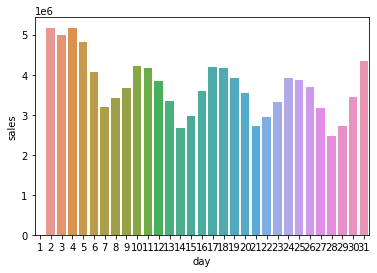

In [137]:
ax = sns.barplot(x="day", y="sales", data=jan_daily_sales_df)

## Observations
There are no sales on Day 1. Day 2 had highest sales followed by day 4, 3 and 5. 
We observe seasonality across the whole month of march

## Jan Medicine Analysis

In [138]:
jan_medicine_df = jan_df.groupby("medicine").agg({"sales":sum}).reset_index()
jan_medicine_df = jan_medicine_df.sort_values(by="sales", ascending = False)
jan_medicine_df.head() 

medicine        sales
1076     1077  969888.0000
2102     2103  920141.5512
573       574  682993.7516
2050     2051  655436.1388
767       768  529972.0000

In [139]:
jan_medicine_df.tail() 

medicine  sales
3239     3240    0.0
3240     3241    0.0
3241     3242    0.0
3242     3243    0.0
3388     3389    0.0

In [140]:
jan_zero_sales_meds = jan_medicine_df[jan_medicine_df["sales"]==0]
jan_zero_sales_meds = jan_zero_sales_meds["medicine"]
len(jan_zero_sales_meds)

230

## Observation
In January medicine 1077 has most sale followed by 2103 
Also there are 230 medcine that have zero sales in Jan accross, years and cities

## March Daily Analysis 

In [141]:
march_daily_sales_df = march_df.groupby(["day"]).agg({"sales":sum}).reset_index()
march_daily_sales_df = march_daily_sales_df.sort_values(by="sales", ascending=False)
march_daily_sales_df.head()

day        sales
0    1  4713841.724
15  16  4512265.224
8    9  4357042.104
1    2  4262080.644
22  23  4202882.308

In [142]:
march_daily_sales_df.tail()

day        sales
23  24  3178757.468
25  26  3135853.416
10  11  2993713.068
17  18  2920423.692
24  25  2908678.032

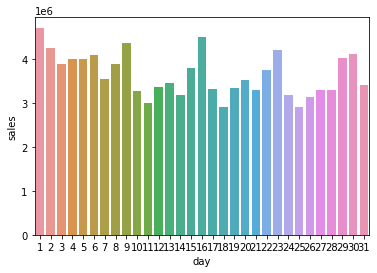

In [143]:
ax = sns.barplot(x="day", y="sales", data=march_daily_sales_df)

## Observation
For March Day 1 has most sale followed by day 16, 9 , 2. Day 25 has least sale. 
We see a spike in sales every week

## March Medicine Analysis 

In [144]:
march_medicine_df = march_df.groupby("medicine").agg({"sales":sum}).reset_index()
march_medicine_df = march_medicine_df.sort_values(by="sales", ascending = False)
march_medicine_df.head() 

medicine        sales
2102     2103  908605.6956
1076     1077  871052.0000
573       574  655234.9280
2050     2051  623326.3252
767       768  578864.0000

In [145]:
march_medicine_df.tail() 

medicine  sales
2690     2691    0.0
2729     2730    0.0
2747     2748    0.0
2749     2750    0.0
3388     3389    0.0

In [146]:
march_zero_sales_meds = march_medicine_df[march_medicine_df["sales"]==0]
march_zero_sales_meds = march_zero_sales_meds["medicine"]
len(march_zero_sales_meds)

173

## Observation
In march medicine 2103 has most sale followed by 1077 Also there are 173 medcine that have zero sales in march accross, years and cities

## December Daily Analysis

In [147]:
dec_daily_sales_df = dec_df.groupby(["day"]).agg({"sales":sum}).reset_index()
dec_daily_sales_df = dec_daily_sales_df.sort_values(by="sales", ascending=False)
dec_daily_sales_df.head()

day        sales
20  21  4932453.684
22  23  4825975.468
21  22  4620771.676
19  20  4456265.196
5    6  4255498.136

In [148]:
dec_daily_sales_df.tail() 

day         sales
2    3  2.863201e+06
9   10  2.766788e+06
10  11  2.728222e+06
3    4  2.648036e+06
24  25  0.000000e+00

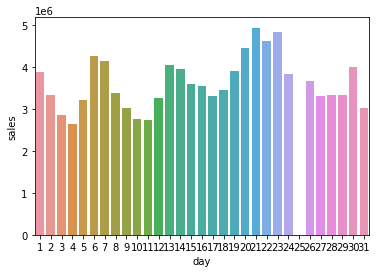

In [149]:
ax = sns.barplot(x="day", y="sales", data=dec_daily_sales_df) 

## Observation
There are no sale on Christmas day. Day 21 has most sales followed by day 23 and 22. We also see some seasonality in December

## Dec Medicine Analysis

In [150]:
dec_medicine_df = dec_df.groupby("medicine").agg({"sales":sum}).reset_index()
dec_medicine_df = dec_medicine_df.sort_values(by="sales", ascending = False)
dec_medicine_df.head() 

medicine        sales
411       412  1545356.272
2102     2103   868458.456
1076     1077   749732.000
1298     1299   675096.000
116       117   674426.052

In [151]:
dec_medicine_df.tail() 

medicine  sales
3217     3218    0.0
3218     3219    0.0
3219     3220    0.0
3220     3221    0.0
3388     3389    0.0

In [152]:
dec_zero_sales_meds = dec_medicine_df[dec_medicine_df["sales"]==0]
dec_zero_sales_meds = dec_zero_sales_meds["medicine"]
len(dec_zero_sales_meds)

265

## Observation
In december medicine 412 has most sale followed by 2103 and 1077 Also there are 265 medcine that have zero sales in Dec accross, years and cities

## August Daily Analysis

In [153]:
aug_daily_sales_df = aug_df.groupby(["day"]).agg({"sales":sum}).reset_index()
aug_daily_sales_df = aug_daily_sales_df.sort_values(by="sales", ascending=False)
aug_daily_sales_df.head()

day        sales
30  31  3276434.220
1    2  3258604.444
29  30  3208267.944
2    3  3040040.360
0    1  3002628.560

In [154]:
aug_daily_sales_df.tail() 

day        sales
25  26  2049967.784
5    6  1966753.592
19  20  1934097.136
12  13  1877884.216
26  27  1869823.692

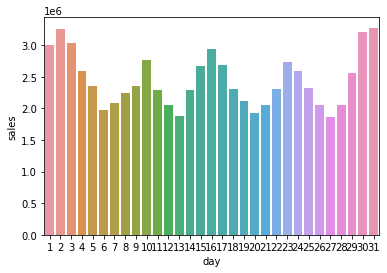

In [155]:
ax = sns.barplot(x="day", y="sales", data=aug_daily_sales_df) 

## Observation
Day 31 has most sales followed by day 2 and 30. Day 27 has least sale. We also see seasonality in august

## August Medicine Analysis

In [156]:
aug_medicine_df = aug_df.groupby("medicine").agg({"sales":sum}).reset_index()
aug_medicine_df = aug_medicine_df.sort_values(by="sales", ascending = False)
aug_medicine_df.head() 

medicine       sales
1076     1077  683196.000
573       574  500541.412
2102     2103  454824.112
313       314  369768.000
197       198  359860.000

In [157]:
aug_medicine_df.tail() 

medicine  sales
2996     2997    0.0
2997     2998    0.0
2998     2999    0.0
2999     3000    0.0
3388     3389    0.0

In [158]:
aug_zero_sales_meds = aug_medicine_df[aug_medicine_df["sales"]==0]
aug_zero_sales_meds = aug_zero_sales_meds["medicine"]
len(aug_zero_sales_meds) 

589

## Observation
In aug medicine 1077 has most sale followed by 574 and 2103 Also there are 589 medcine that have zero sales in aug accross, years and cities

## Yearly Analysis
In the above graphs we have seen that there is huge difference in sales in 2015 and 2016. One thing that happened in 2016 is that discounts were introduced. So, Lets deep dive 

In [159]:
df_2015 = train_df_discounted[train_df_discounted["year"]==2015]
df_2016 = train_df_discounted[train_df_discounted["year"]==2016]

In [160]:
print(df_2015.shape)
print(df_2016.shape)

(4608145, 7)
(6273455, 7)


## 2015 Monthly Analysis

In [161]:
monthy_sales_df_2015 = df_2015.groupby(["month"]).agg({"sales":sum}).reset_index()
monthy_sales_df_2015 = monthy_sales_df_2015.sort_values(by="sales", ascending=False)
monthy_sales_df_2015

month         sales
11    12  2.601750e+07
10    11  2.021856e+07
2      3  1.885934e+07
8      9  1.884098e+07
9     10  1.865485e+07
5      6  1.845696e+07
4      5  1.815559e+07
7      8  1.782386e+07
3      4  1.770204e+07
6      7  1.740144e+07
0      1  1.739804e+07
1      2  1.568562e+07

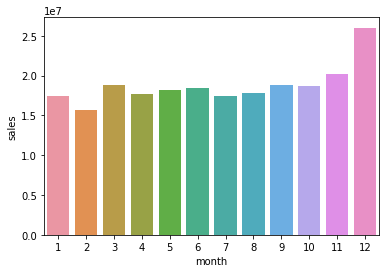

In [162]:
ax = sns.barplot(x="month", y="sales", data=monthy_sales_df_2015) 

## Observation
In 2015 december has the highest sales followed by november and march and feb has the least sales. However, looking at the graph it feels that the sale never realy took off until december

## 2016 Monthly Analysis

In [163]:
monthy_sales_df_2016 = df_2016.groupby(["month"]).agg({"sales":sum}).reset_index()
monthy_sales_df_2016 = monthy_sales_df_2016.sort_values(by="sales", ascending=False)
monthy_sales_df_2016

month         sales
11    12  4.005019e+07
10    11  3.467199e+07
2      3  3.456666e+07
9     10  3.434579e+07
8      9  3.413846e+07
6      7  3.229770e+07
0      1  3.216866e+07
7      8  2.250624e+07
4      5  2.221270e+07
5      6  2.178343e+07
3      4  2.136973e+07
1      2  1.917475e+07

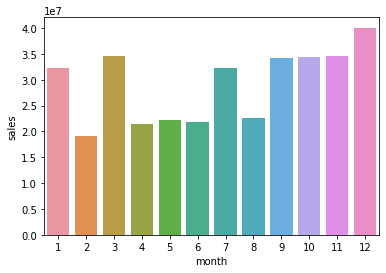

In [164]:
ax = sns.barplot(x="month", y="sales", data=monthy_sales_df_2016) 

## Observation
Both in 2015 and 2016 highest sales in December. But, the sale has almost doubled

## 2015 Medicine Analysis

In [165]:
medicine_df_2015 = df_2015.groupby("medicine").agg({"sales":sum}).reset_index()
medicine_df_2015 = medicine_df_2015.sort_values(by="sales", ascending = False)
medicine_df_2015.head() 

medicine        sales
1076     1077  2522884.000
573       574  2121774.744
767       768  1771236.000
313       314  1628824.000
315       316  1318256.000

In [166]:
medicine_df_2015.tail() 

medicine  sales
2332     2333    0.0
2331     2332    0.0
2330     2331    0.0
2329     2330    0.0
3388     3389    0.0

In [167]:
zero_sales_meds_2015 = medicine_df_2015[medicine_df_2015["sales"]==0]
zero_sales_meds_2015 = zero_sales_meds_2015["medicine"]
len(zero_sales_meds_2015) 

1580

## Observation
In 2015 medicine 1077 has most sale followed by 574 and 768 Also there are 1589 medcines that have zero sales in 2015. This implies almost half of the medicine went unsold in 2015

## 2016 Medicine Analysis

In [168]:
medicine_df_2016 = df_2016.groupby("medicine").agg({"sales":sum}).reset_index()
medicine_df_2016 = medicine_df_2016.sort_values(by="sales", ascending = False)
medicine_df_2016.head() 

medicine         sales
2102     2103  3.160088e+06
1076     1077  2.508540e+06
2050     2051  2.332424e+06
573       574  2.097634e+06
1516     1517  1.905028e+06

In [169]:
medicine_df_2016.tail() 

medicine  sales
2874     2875    0.0
2875     2876    0.0
2876     2877    0.0
2877     2878    0.0
3388     3389    0.0

In [170]:
zero_sales_meds_2016 = medicine_df_2016[medicine_df_2016["sales"]==0]
zero_sales_meds_2016 = zero_sales_meds_2016["medicine"]
len(zero_sales_meds_2016) 

774

## Observation
In 2016 medicine 2103 has most sale followed by 1077 and 2051 Also there are 774 medcines that have zero sales in 2016. This implies number of zero sales medicines reduced by 51%

# Visualizing Citywise Aggregated Sales 

In [171]:
train_df_discounted_copy = train_df_discounted.copy()
train_df_discounted_copy.city = train_df_discounted_copy.city.astype("int")
train_df_discounted_copy.dtypes

year          category
month         category
day           category
city             int64
medicine      category
sales          float64
discounted    category
dtype: object

In [172]:
def convert_type_to_int(df, col_list):
  for col in col_list:
    df[col] = df[col].astype("int")
  return df

In [173]:
train_df_discounted_copy = convert_type_to_int(df=train_df_discounted_copy, col_list=cat_columns)

In [174]:
train_df_discounted_copy.dtypes

year            int64
month           int64
day             int64
city            int64
medicine        int64
sales         float64
discounted      int64
dtype: object

In [175]:
city = {4: 'Mumbai', 5: 'Delhi', 7: 'Bangalore', 1: 'Kolkata',
        6: 'Chennai', 8: 'Hyderabad', 9: 'Ahmedabad', 3: 'Jaipur', 10: 'Lucknow', 2: 'Other'}
train_df_discounted_copy["city"]=train_df_discounted_copy["city"].map(city)

In [176]:
import plotly.express as px

In [177]:
def get_category_order_sales_for(df, col, ascending=True):
    temp=df.groupby([col])["sales"].sum().sort_values().reset_index()
    temp["sales"]=np.round(temp["sales"])
    category_orders = list(temp[col])
    return category_orders

In [178]:
get_category_order_sales_for(df=train_df_discounted_copy, col="city")

['Other',
 'Lucknow',
 'Jaipur',
 'Hyderabad',
 'Ahmedabad',
 'Chennai',
 'Kolkata',
 'Bangalore',
 'Delhi',
 'Mumbai']

In [179]:
def plot_agg_sales(df, groupby, x, color):
    temp=df.groupby(groupby)["sales"].sum().reset_index()
    temp["sales"]=np.round(temp["sales"])
    title = f"aggregated sales for {x}"
    cat_orders = get_category_order_sales_for(df, x)
    fig5 = px.bar(temp, x=x, y="sales", barmode='group',
              title=title, color = color,
              category_orders={x:cat_orders})
    fig5.show()

In [180]:
plot_agg_sales(train_df_discounted_copy, groupby = ["year", "city"], x = "city", color = "year")

In [181]:
plot_agg_sales(train_df_discounted_copy, groupby = ["month", "city"], x = "city", color = "month")

# Negative Sales Analysis

In [182]:
train_neg_df_discounted_copy = train_neg_df_discounted.copy()

In [183]:
city_frame = {}
for city in train_neg_df_discounted_copy.city.unique():
    df = train_neg_df_discounted_copy[train_neg_df_discounted_copy["city"]==city]
    city_frame[city] = df

In [184]:
kolkata_neg_data = city_frame[1]
other_neg_data = city_frame[2]
jaipur_neg_data = city_frame[3]
mumbai_neg_data = city_frame[4]
delhi_neg_data = city_frame[5]
chennai_neg_data = city_frame[6]
bengaluru_neg_data = city_frame[7]
hyderabad_neg_data = city_frame[8]
ahemdabad_neg_data = city_frame[9] 
lucknow_neg_data = city_frame[10] 

In [185]:
city = {4: 'Mumbai', 5: 'Delhi', 7: 'Bangalore', 1: 'Kolkata',
        6: 'Chennai', 8: 'Hyderabad', 9: 'Ahmedabad', 3: 'Jaipur', 10: 'Lucknow', 2: 'Other'}
train_neg_df_discounted_copy["city"]=train_neg_df_discounted_copy["city"].map(city)
train_neg_df_discounted_copy.head()

year  month  day     city  medicine  sales  discounted
17792  2015      1    3  Chennai       117 -32.32         0.0
73647  2015      1    8   Mumbai        50  -8.00         0.0
83397  2015      1    9    Other       785  -4.00         0.0
85164  2015      1    9   Mumbai       232  -8.00         0.0
86418  2015      1    9    Delhi       253 -40.00         0.0

In [186]:
train_neg_df_discounted_copy = change_to_category(train_neg_df_discounted_copy, cat_columns)
train_neg_df_discounted_copy.dtypes

year          category
month         category
day           category
city          category
medicine      category
sales          float64
discounted    category
dtype: object

# City-wise Analysis

## Kolkata Analysis

In [187]:
def do_city_analysis(df, city):
    city_df = df[df["city"] == city]
    city_df["year"] = city_df["year"].astype("category")
    city_df["month"] = city_df["month"].astype("category")
    city_df["day"] = city_df["day"].astype("category")
    fig_dims = (20, 20)
    f, axes = plt.subplots(nrows=3, ncols=1, figsize = fig_dims)
    yearly_sales_df = city_df.groupby(["year"]).agg({"sales":sum}).reset_index()
    yearly_sales_df = yearly_sales_df.sort_values(by="sales", ascending=False)

    sns.barplot(x="sales", y="year", data=yearly_sales_df, ax=axes[0])

    monthy_sales_df = city_df.groupby(["month"]).agg({"sales":sum}).reset_index()
    monthy_sales_df = monthy_sales_df.sort_values(by="sales", ascending=False)

    sns.barplot(x="sales", y="month", data=monthy_sales_df, ax=axes[1])

    daily_sales_df = city_df.groupby(['day']).agg({"sales":sum}).reset_index()
    daily_sales_df = daily_sales_df.sort_values(by="sales", ascending = False)

    sns.barplot(x="sales", y="day", data=daily_sales_df, ax=axes[2])

    medicine_df = city_df.groupby(["medicine"]).agg({"sales":sum}).reset_index()
    medicine_df = medicine_df.sort_values(by="sales", ascending=False)

    zero_sales_meds = medicine_df[medicine_df["sales"]==0]["medicine"]
    print(f"total # of medicenes with zero sale: {len(zero_sales_meds)}")
    plt.show()

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 817


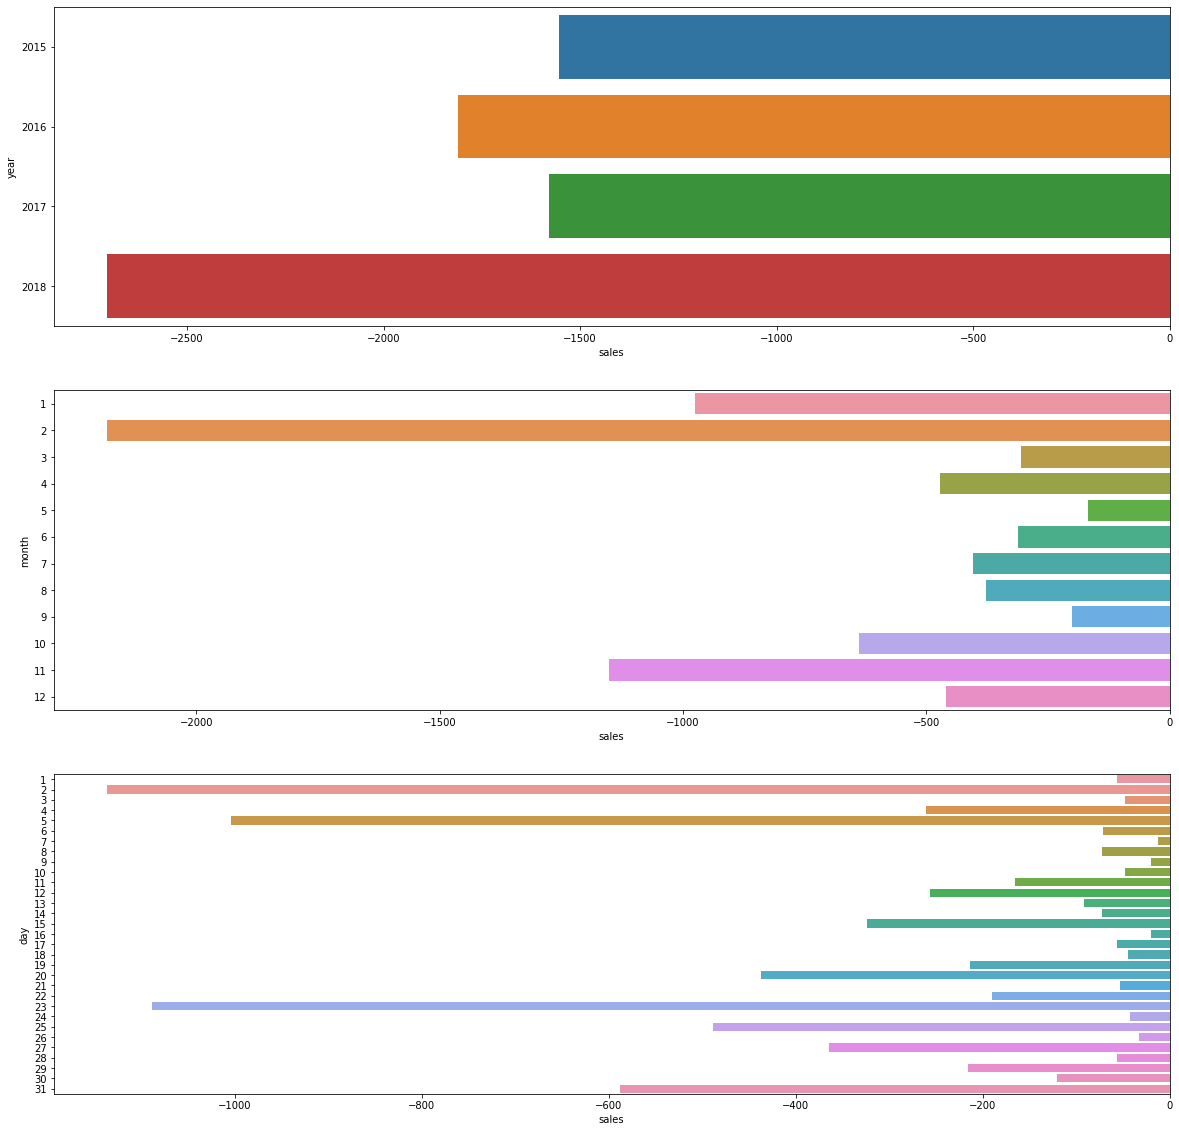

In [188]:
do_city_analysis(train_neg_df_discounted_copy, "Kolkata")

## Observation 
1. 2015 shows least  negative sales for kolkata and 2018 shows most  negative sales for kolkata
2. For kolkata May has the least negative sales and February has the lowest sales
3. In Kolkata seventh day has the least negative sales and 2nd day has the most negative sales

## Kolkata Medicine Analysis

In [189]:
kolkata_medicine_data = kolkata_neg_data.groupby(["medicine"]).agg({"sales":sum}).reset_index()
kolkata_medicine_data = kolkata_medicine_data.sort_values(by="sales", ascending=False)
kolkata_medicine_data.tail()  

medicine  sales
15        203 -476.0
103      1559 -632.0
115      1815 -656.0
102      1534 -700.0
101      1515 -804.0

## Observation 
Medicine 1515 has most number of negative sales 

## Jaipur Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 818


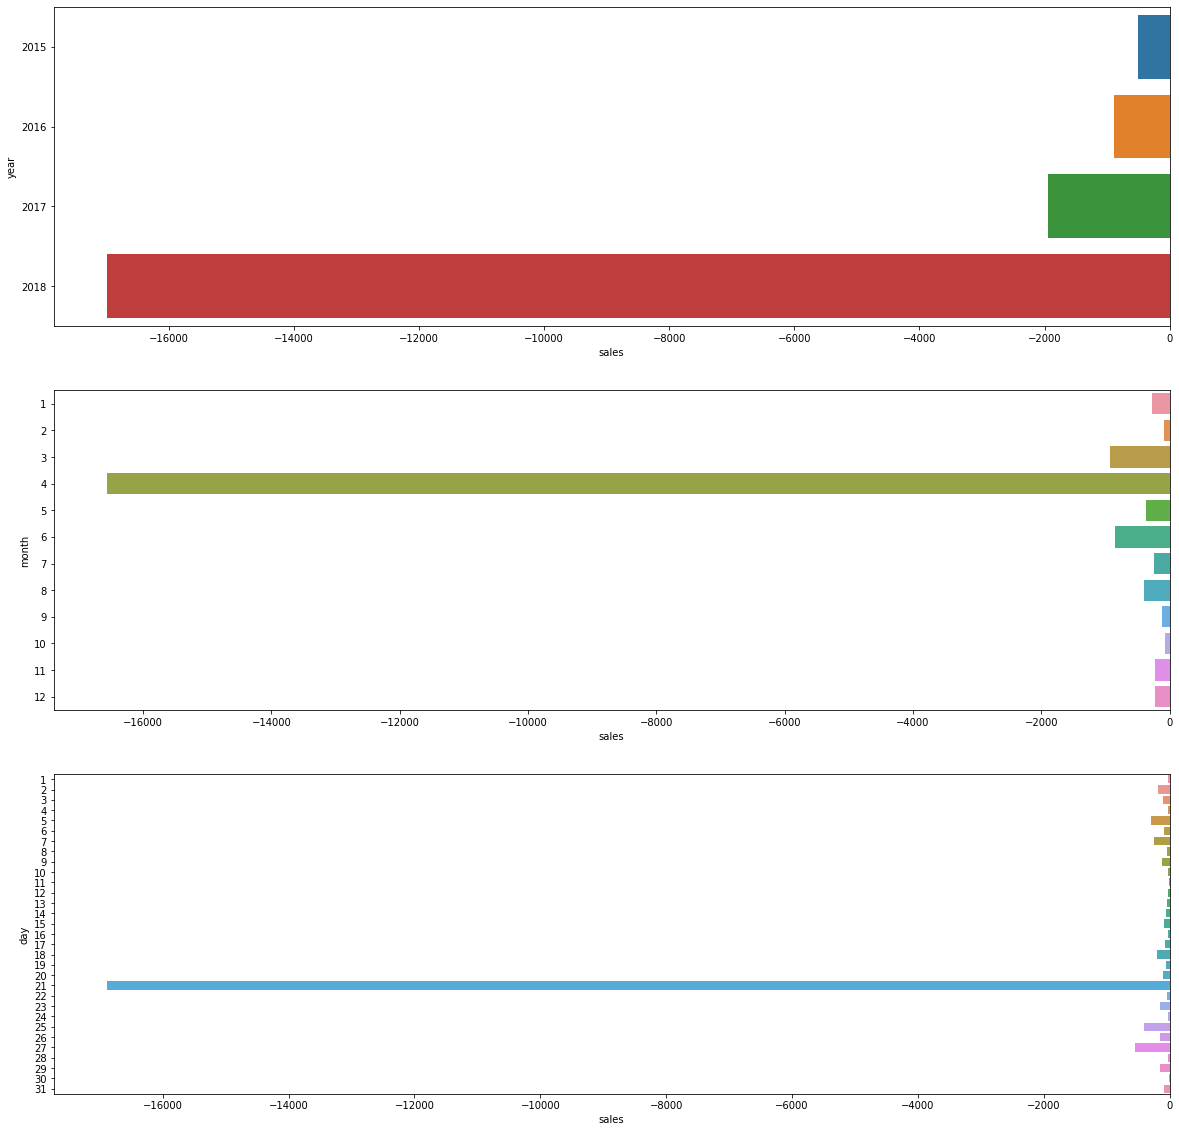

In [190]:
do_city_analysis(train_neg_df_discounted_copy, "Jaipur")

## Observation 
For Jaipur 2018 has the highest negative sales and 2015 has the lowest negative sales
For Jaipur April has most negative sales and October has the least negative sales 3.For Jaipur Day 30 has the highest negative sales and Day 26 has the least sales

## Jaipur Medicine Analysis

In [191]:
jaipur_medicine_data = jaipur_neg_data.groupby(["medicine"]).agg({"sales":sum}).reset_index()
jaipur_medicine_data = jaipur_medicine_data.sort_values(by="sales")
jaipur_medicine_data.head() 

medicine   sales
150      2401 -3968.0
111      1749 -3956.0
149      2399 -3940.0
2          22 -2664.0
118      1901 -1900.0

In Jaipur medicine 2401 has the highest negative sales

## Mumbai Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 767


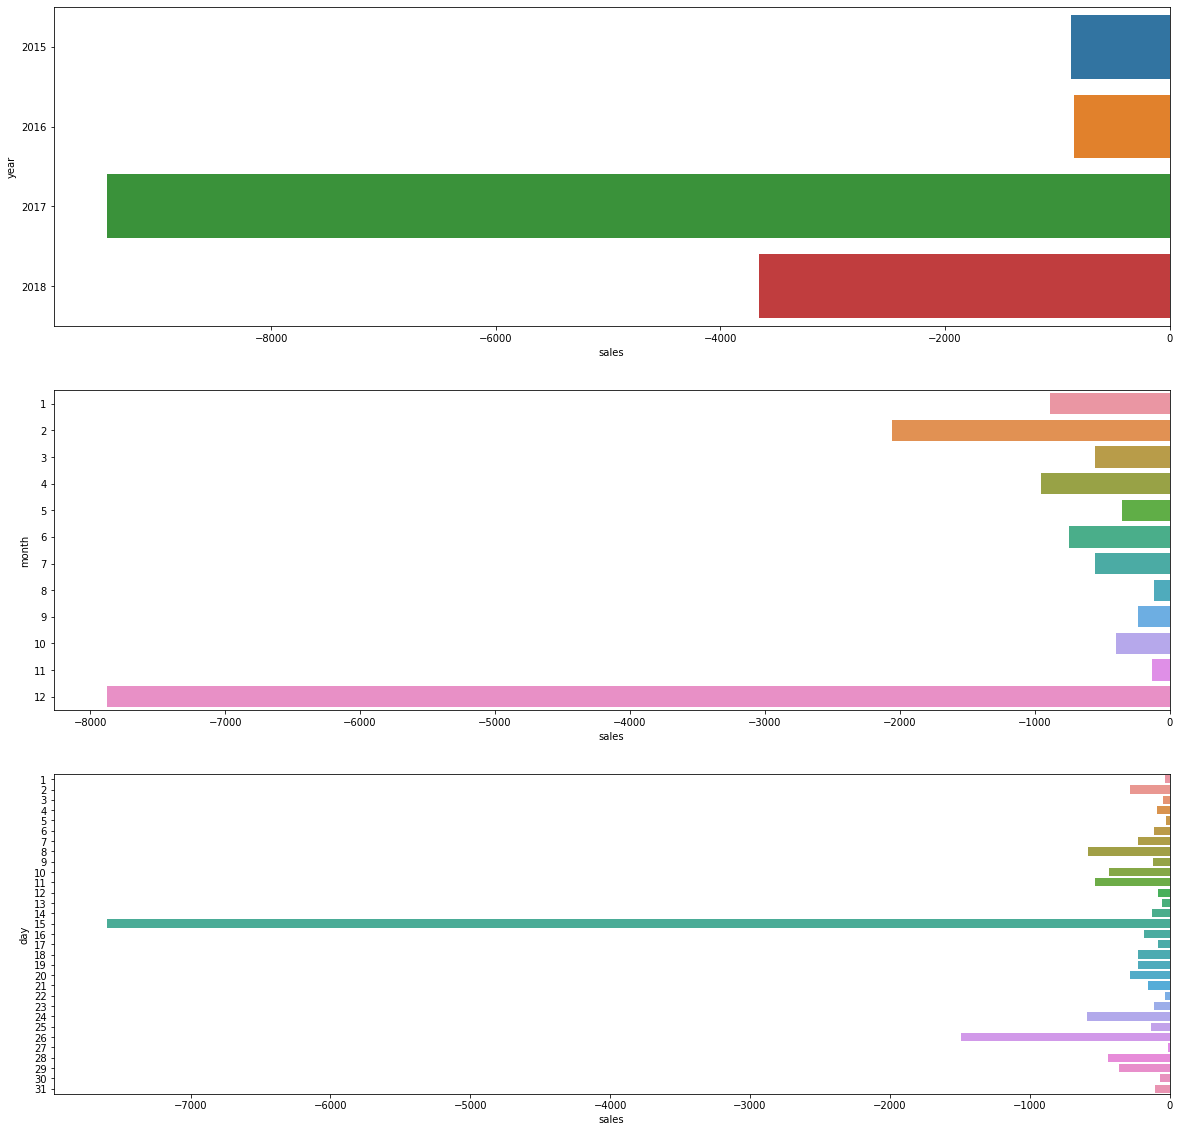

In [192]:
do_city_analysis(train_neg_df_discounted_copy, "Mumbai")

For Mumbai 2017 has most negative sales and 2016 has the least sales
For Mumbai December has most negative sales followed by january, June and December. August has the least negative sales
For Mumbai day 15 has the highest negative sales and Day 27 has the least negative sales

## Mumbai Medicine Analysis

In [193]:
mumbai_medicine_data = mumbai_neg_data.groupby(["medicine"]).agg({"sales":sum}).reset_index()
mumbai_medicine_data = mumbai_medicine_data.sort_values(by="sales")
mumbai_medicine_data.head() 

medicine   sales
15        167 -7224.0
19        204 -1452.0
68        930  -432.0
8          89  -376.0
129      1535  -300.0

for mumbai medicine 167 has the highest negative sales

## Delhi Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 860


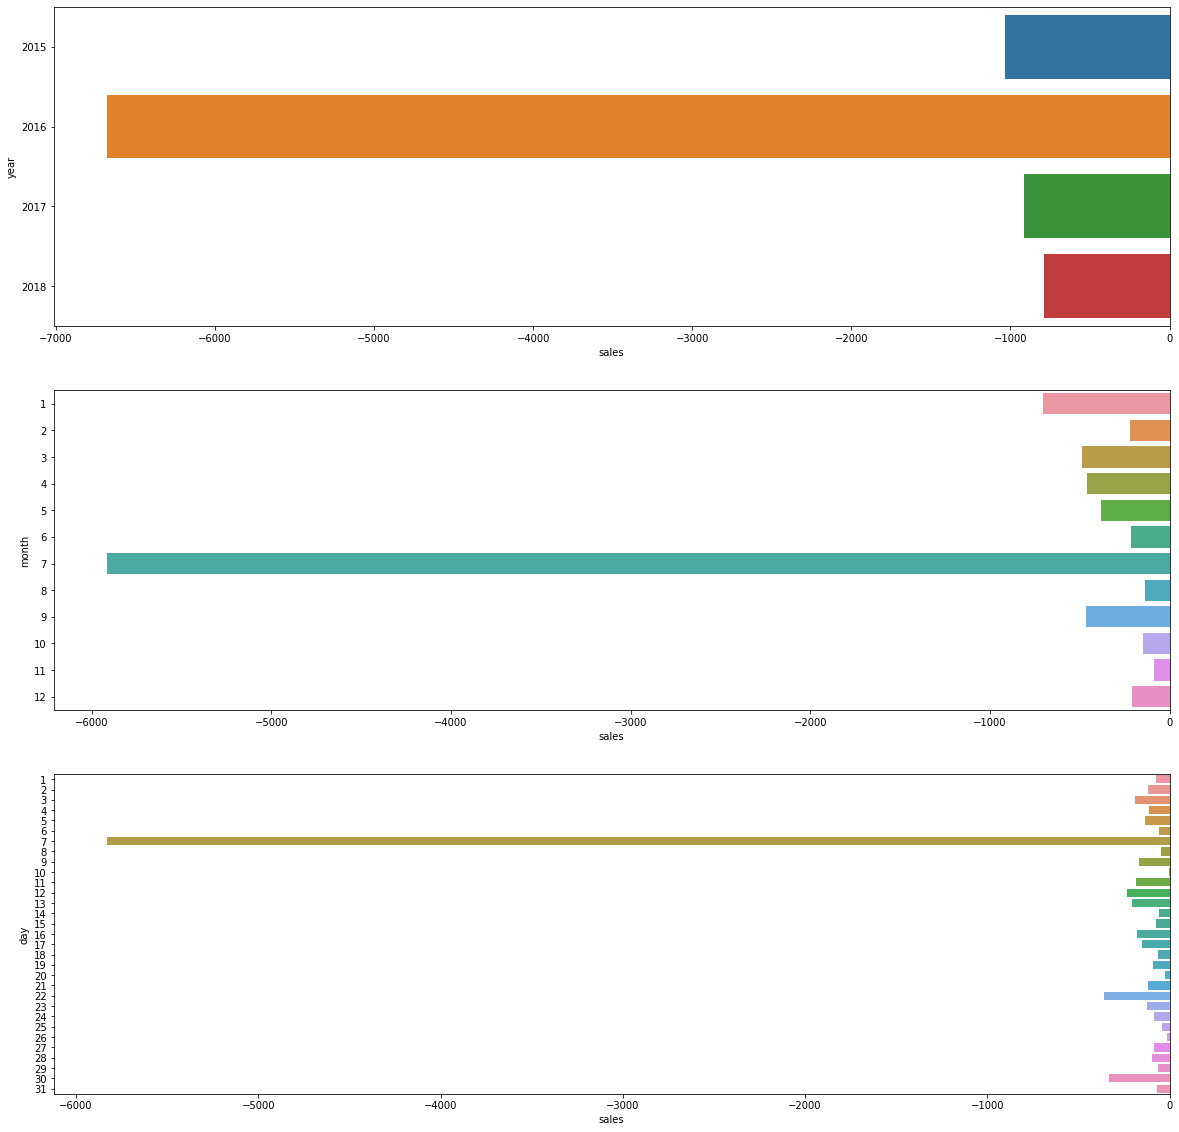

In [194]:
do_city_analysis(train_neg_df_discounted_copy, "Delhi")

## Delhi Medicine Analysis

In [195]:
delhi_medicine_data = delhi_neg_data.groupby(["medicine"]).agg({"sales":sum}).reset_index()
delhi_medicine_data = delhi_medicine_data.sort_values(by="sales")
delhi_medicine_data.head() 

medicine    sales
34       792 -5804.00
39       976  -336.00
9         96  -256.00
6         83  -184.00
67      1383  -167.42

For Delhi medicine 792 has highest negative sales

## Chennai Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 869


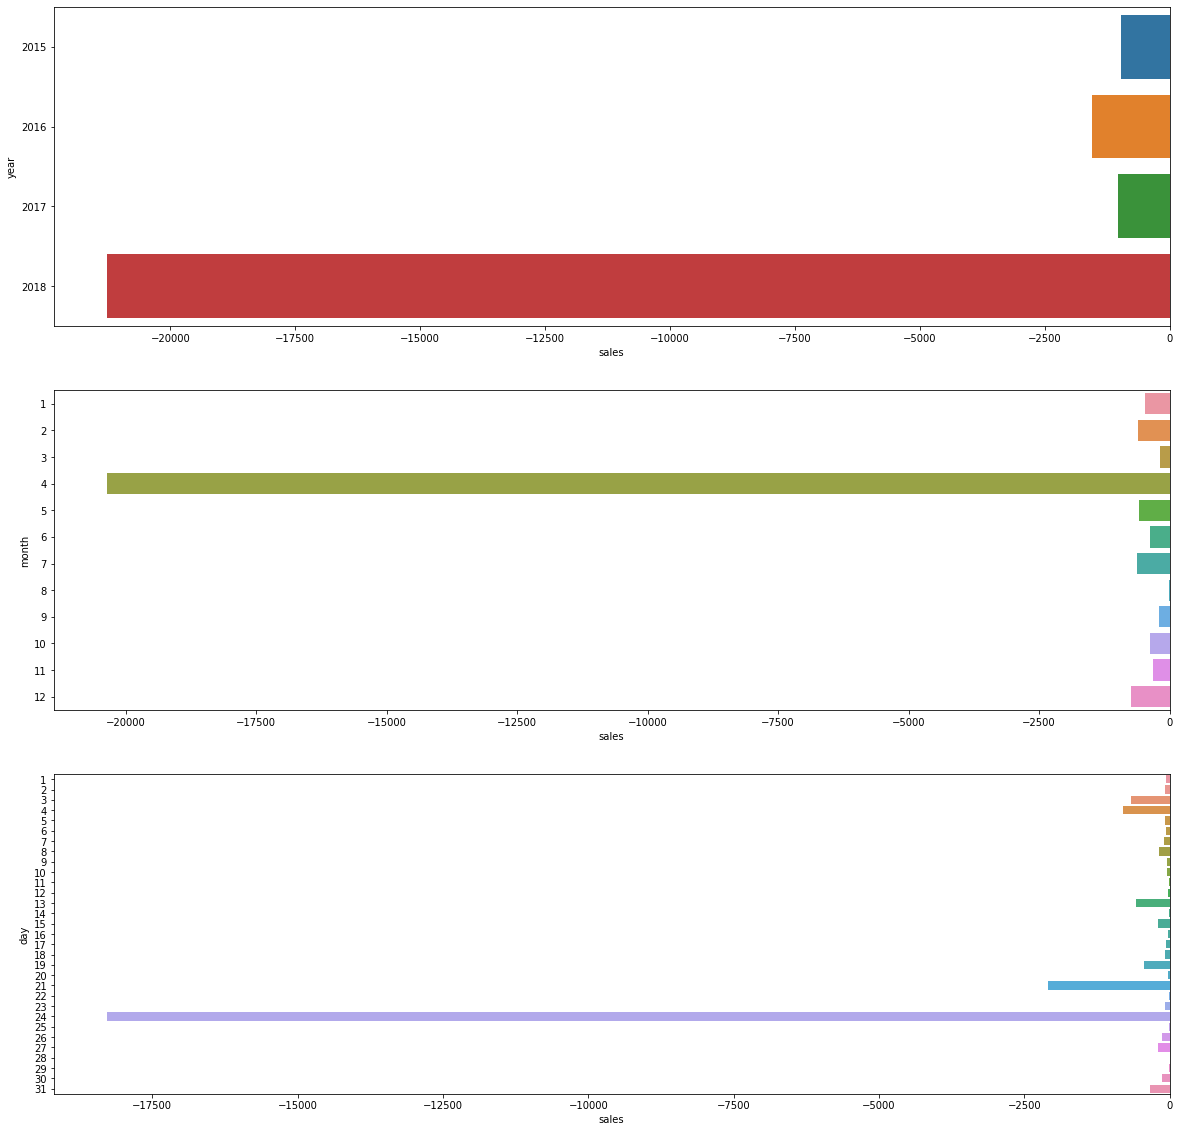

In [196]:
do_city_analysis(train_neg_df_discounted_copy, "Chennai")

For Chennai 2018 has most negative sale and 2015 has least no of sales
For Chennai April has the most negative sales and Aug has the least negative sales
For Chennai day 24 has most negative sales and day 28 has the least Negative sales

# Chennai Medicine Analysis

In [197]:
chennai_medicine_data = chennai_neg_data.groupby(["medicine"]).agg({"sales":sum}).reset_index()
chennai_medicine_data = chennai_medicine_data.sort_values(by="sales")
chennai_medicine_data.head() 

medicine   sales
104      2472 -9984.0
11        352 -3932.0
16        451 -1988.0
18        521 -1912.0
7         131 -1824.0

In Chennai medicine 2472 has the highest negative sale

## Bengaluru Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 847


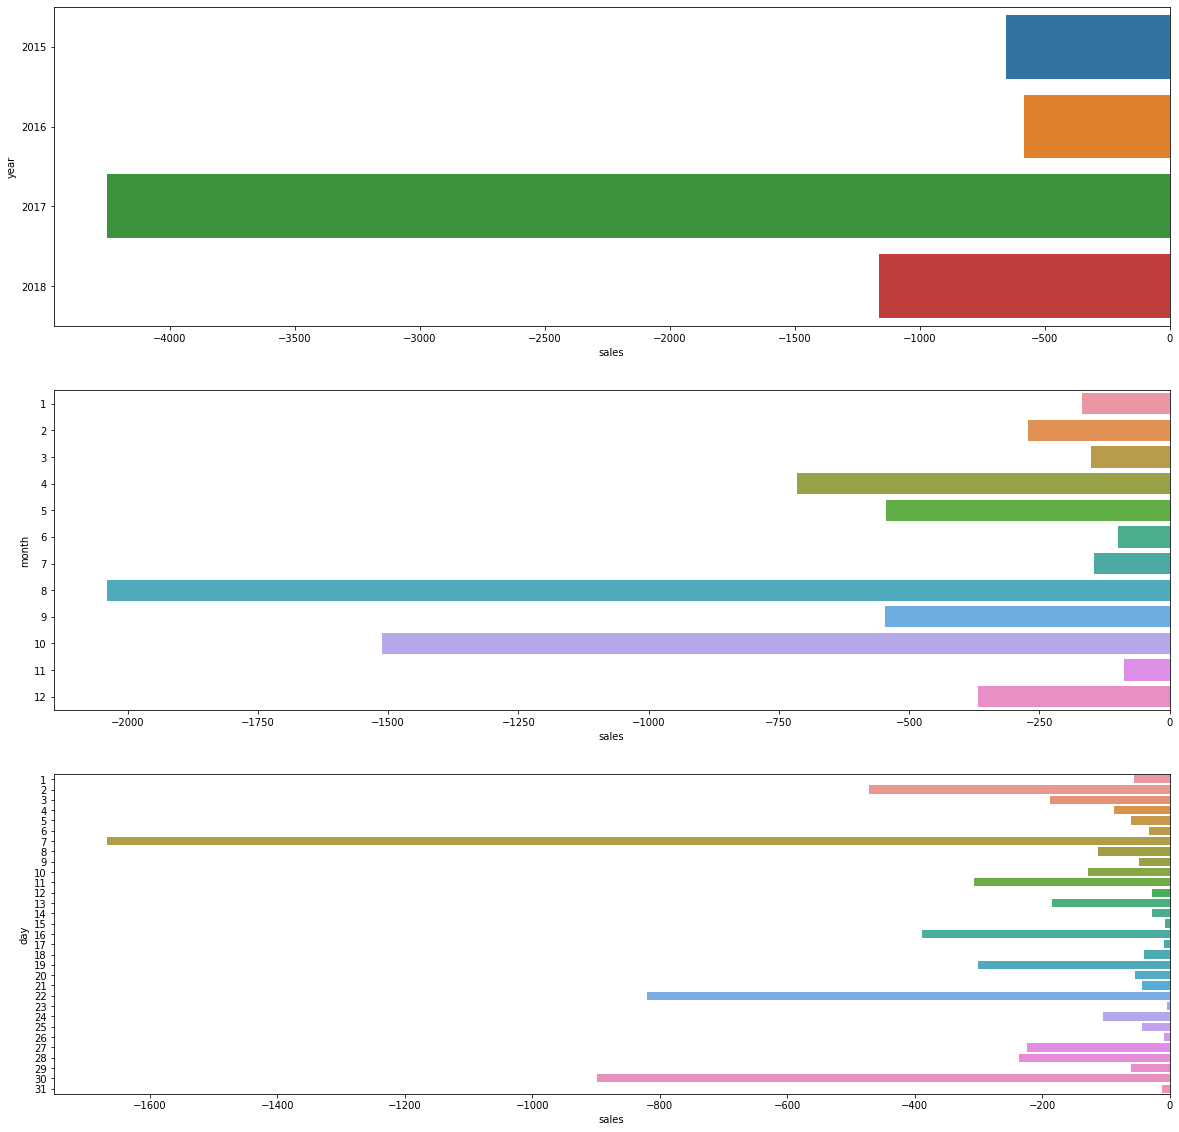

In [198]:
do_city_analysis(train_neg_df_discounted_copy, "Bangalore")

For Bengaluru 2017 has most negative sales and 2015 has least negative sales
For Bengaluru August has most negative sales and October has least no of sales
For Bengaluru Day 7 has most negative sales and day 23 has the least sales

## Bengaluru Medicine Analysis

In [199]:
bengaluru_medicine_data = bengaluru_neg_data.groupby(["medicine"]).agg({"sales":sum}).reset_index()
bengaluru_medicine_data = bengaluru_medicine_data.sort_values(by="sales")
bengaluru_medicine_data.head()

medicine   sales
46      1098 -1632.0
83      1733  -492.0
15       424  -468.0
49      1133  -392.0
93      1867  -336.0

For Bengaluru medicine 1098 has the highest negative sales

## Hyderabad Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 925


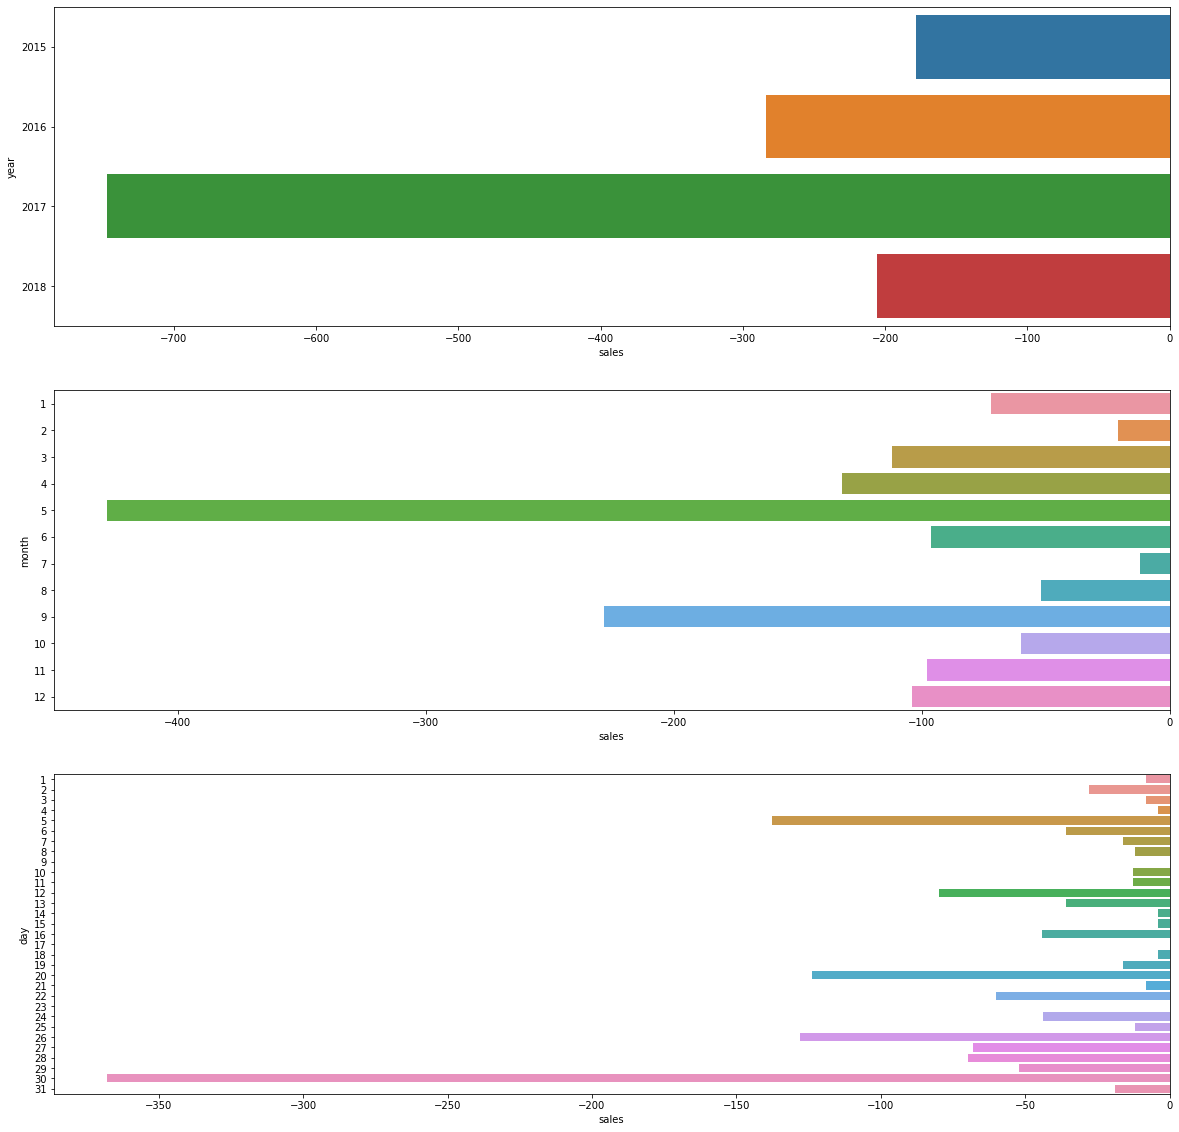

In [200]:
do_city_analysis(train_neg_df_discounted_copy, "Hyderabad")

For Hyderabad 2017 show most negative sales and 2015 has least sales
For Hyderabad May has most negative sales July has least negative sales
For Hyderabad Day 30 has the most negative sale and day 17, 23, 9 has the least sales

## Hyderabad Medicine Analysis

In [201]:
hyderabad_medicine_data = hyderabad_neg_data.groupby(["medicine"]).agg({"sales":sum}).reset_index()
hyderabad_medicine_data = hyderabad_medicine_data.sort_values(by="sales")
hyderabad_medicine_data.head() 

medicine  sales
21       846 -368.0
24       902 -136.0
3        185  -92.0
27      1114  -76.0
55      2256  -64.0

For Hyderabad medicine 846 has the highest negative sales

## Ahmedabad Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 774


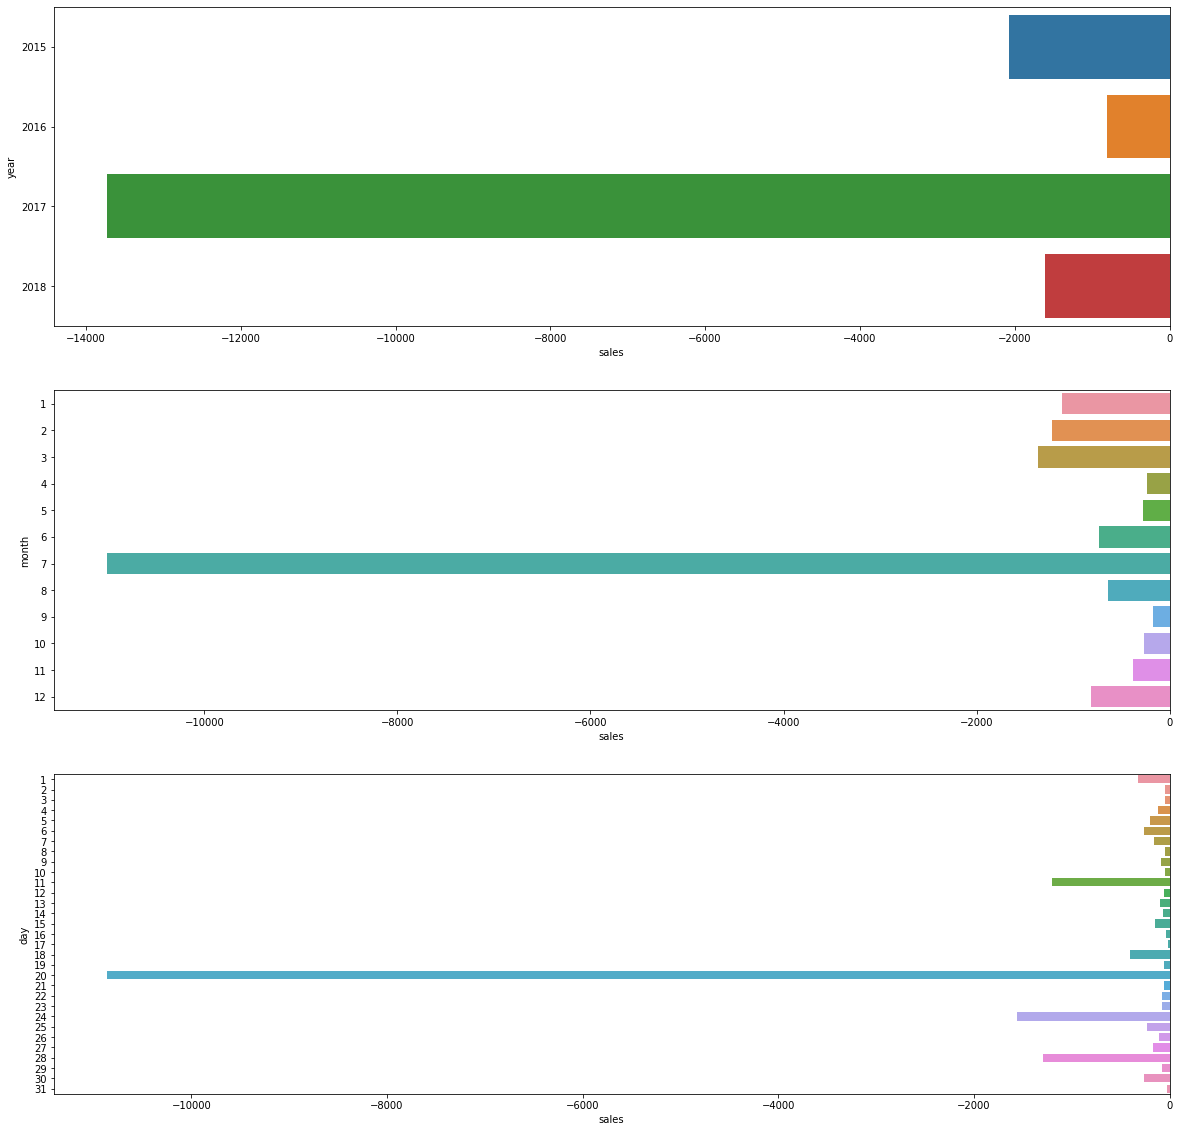

In [202]:
do_city_analysis(train_neg_df_discounted_copy, "Ahmedabad")

1. for Ahemdabad 2017 had most negative sales and 2016 had least negative sales
2. For Ahemdabad July has most negative sales followed by March, June and Jan. sept has the least  negative sales
3. For Ahemdabad day 20 had most negative sales and day 20 has least sales

## Ahmedabad Medicine Analysis

In [203]:
ahemdabad_medicine_data = ahemdabad_neg_data.groupby(["medicine"]).agg({"sales":sum}).reset_index()
ahemdabad_medicine_data = ahemdabad_medicine_data.sort_values(by="sales")
ahemdabad_medicine_data.head() 

medicine     sales
82       1144 -9600.000
164      2181 -1208.352
158      2068  -958.812
21        233  -780.000
19        225  -596.000

In ahemdabad medicine 1144 has highest negative

## Lucknow Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 884


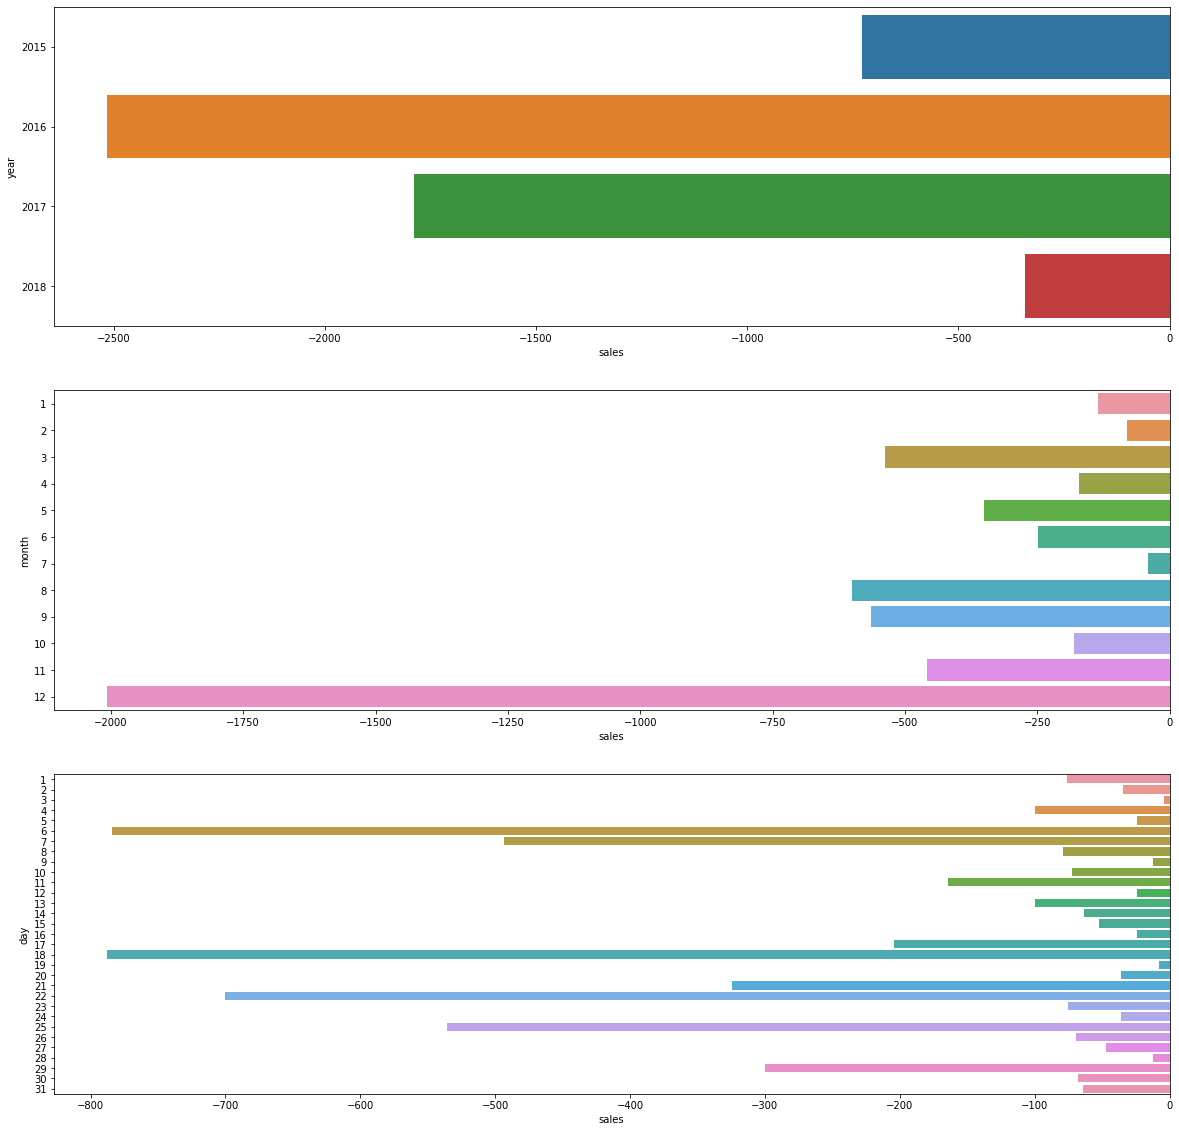

In [204]:
do_city_analysis(train_neg_df_discounted_copy, "Lucknow")

In Lucknow medicine 3194 has the highest negative sales

## Others Analysis

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/sidharthsingh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

total # of medicenes with zero sale: 863


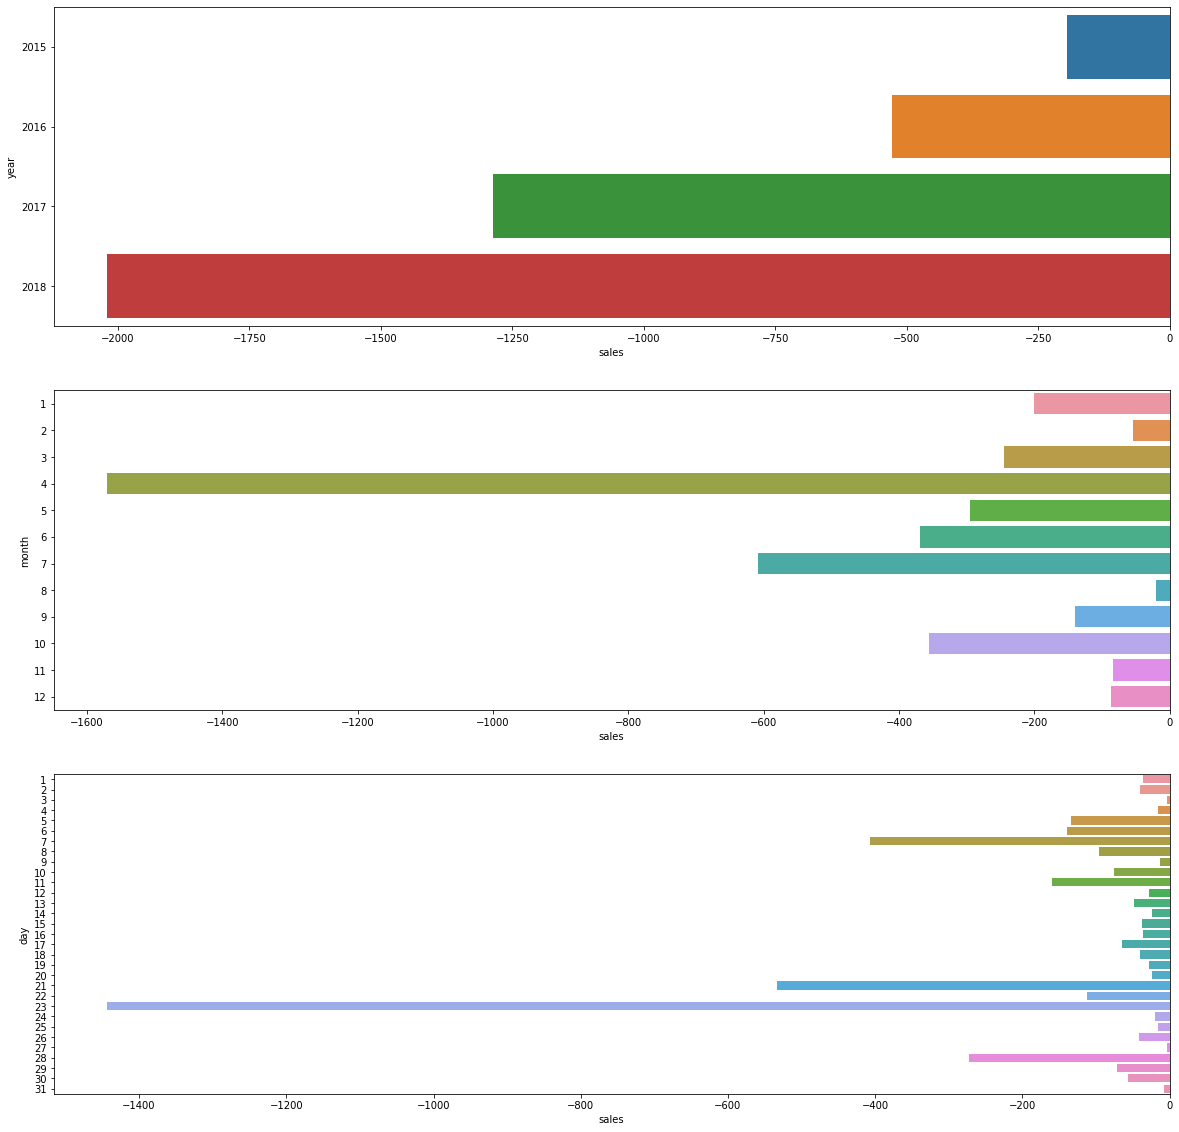

In [205]:
do_city_analysis(train_neg_df_discounted_copy, "Other")

For other cities 2018 has most negative sales and 2015 has the least sales
For Other cities April had the most negative. Aug had the least negative sales
For Other cities day 23 has most number of negative sales Day 3 has least negative sale

## Other City Medicine Analysis

In [206]:
other_medicine_data = other_neg_data.groupby("medicine").agg({"sales":sum}).reset_index()
other_medicine_data = other_medicine_data.sort_values(by="sales")
other_medicine_data.head() 

medicine  sales
81       1762 -640.0
126      3018 -396.0
60       1369 -320.0
13        252 -288.0
0           4 -236.0

For other cities medicine 1762 has highest negative sales

## Solution Design Overview

<img src="images/design_overview.png">

<img src="images/footfall_predictor.png">

<img src="images/agg_sale_predictor.png">

<img src="images/simple_splitter.png">

<img src="images/prophet_model.png">

<img src="images/prediction_combiner.png">

<img src="images/prediction_normaliser.png">

<img src="images/evaluation_engine.png">